In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime

### ANALISI ESPLORATIVA DATASET RATING USER x ITEM

In [2]:
col = ['user', 'item', 'rating', 'timestamp']
df = pd.read_csv("ml-100k/u.data", sep='\t', names=col)
df.head()

user  item  rating  timestamp
0   196   242       3  881250949
1   186   302       3  891717742
2    22   377       1  878887116
3   244    51       2  880606923
4   166   346       1  886397596

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user       100000 non-null  int64
 1   item       100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [4]:
df.nunique()

user           943
item          1682
rating           5
timestamp    49282
dtype: int64

Text(0, 0.5, 'Numero di elementi univoci')

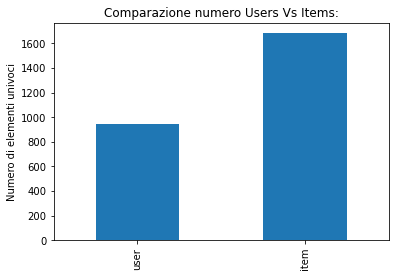

In [5]:
df[["user", "item"]].nunique().plot(kind="bar")

plt.title('Comparazione numero Users Vs Items:')
plt.ylabel('Numero di elementi univoci')

In [6]:
df.rating.mean()

3.52986

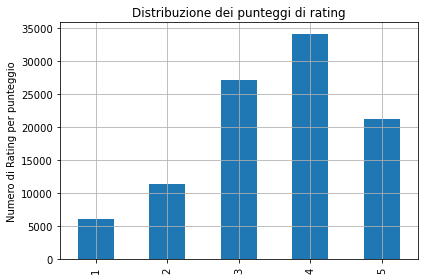

In [7]:
df.rating.value_counts().sort_index().plot(kind='bar')

plt.title('Distribuzione dei punteggi di rating')
plt.ylabel('Numero di Rating per punteggio')
plt.grid()
plt.tight_layout()

# COME SI PUò VEDERE ABBIAMO UNA PREPONDERANZA DI RECENSIONI POSITIVE 
# QUINDI DOVREBBE ESSERE PIU FACILE ESCLUDERE CHE CONSIGLIARE

print(df.rating.mean())

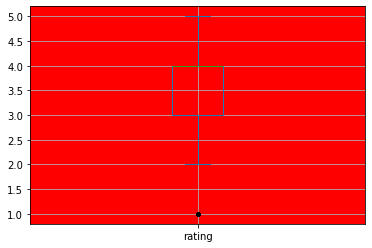

In [8]:
rating_boxplot = df.rating.plot.box(vert=True, sym='k.')
rating_boxplot.set_facecolor('r')

plt.grid(True)
plt.box(True)

In [9]:
df["rating"].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [10]:
df.value_counts("user").sort_values(ascending=False)[0:10]

user
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
dtype: int64

Text(0, 0.5, 'Numero di Rating')

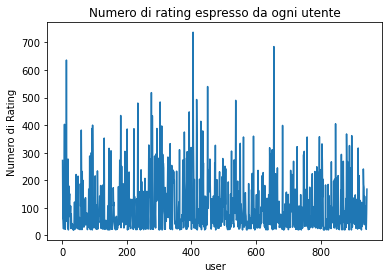

In [11]:
df.value_counts("user").sort_index().plot(kind="line")

plt.title('Numero di rating espresso da ogni utente')
plt.ylabel('Numero di Rating')

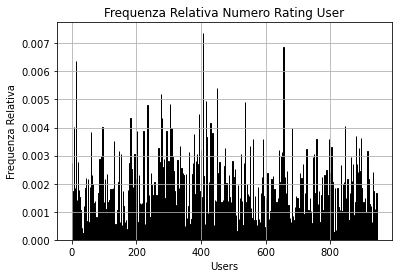

In [12]:
df.user.hist(
    bins=943,
    edgecolor='k',
    facecolor='green',
    density=True #Frequenza Relativa
)

plt.title("Frequenza Relativa Numero Rating User")
plt.ylabel('Frequenza Relativa')
plt.xlabel('Users')
# plt.xticks(range(60, 300, 20))
plt.grid(True)
plt.box(True)

Text(0, 0.5, 'Numero di Rating')

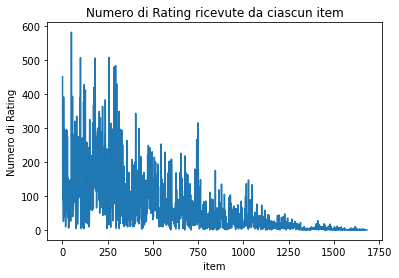

In [13]:
df.value_counts("item").sort_index().plot(kind="line")

plt.title('Numero di Rating ricevute da ciascun item')
plt.ylabel('Numero di Rating')

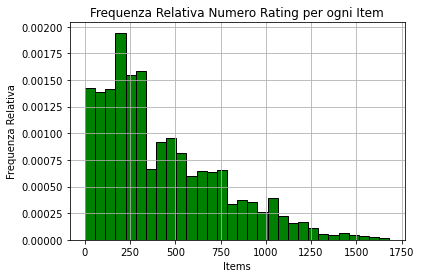

In [14]:
df.item.hist(
    bins=30,
    edgecolor='k',
    facecolor='green',
    density=True #Frequenza Relativa
)

plt.title("Frequenza Relativa Numero Rating per ogni Item")
plt.ylabel('Frequenza Relativa')
plt.xlabel('Items')
# plt.xticks(range(60, 300, 20))
plt.grid(True)
plt.box(True)

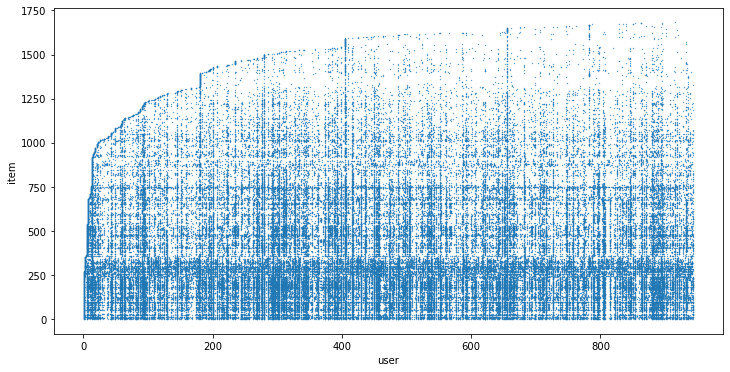

In [15]:
df[["user", "item"]].plot.scatter(x="user", y="item", s=0.1)

plt.rcParams.update({'font.size': 12})
fig = plt.gcf()
fig.set_size_inches(12, 6)

## DATASET ITEM

In [16]:
item_col = ["movie_id","movie_title","release_date","video_release_date",
"IMDb_URL","unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]


item_df = pd.read_csv("ml-100k/u.item", sep='|', names = item_col, encoding='latin-1')
item_df.head()

movie_id        movie_title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film_Noir  Horror  Musical  \
0          0          1           1  ...        0          0       0        0   
1          1          0           0  ...        0          0       0        0   
2          0          0           0  ...        0          0       0        0   
3          0          0           0  ...        0          0       0        0   
4          0          0           0  ...        0          0       0        0   

   Mystery  Romance  Sci_Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        0       0         1    0        0  
2        0        0       0         1    0        0  
3        0        0       0         0    0        0  
4        0        0       0         1    0        0  

[5 rows x 24 columns]

In [17]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film_Noir           1682 non-null   int64  
 16  Horror

In [18]:
item_df.describe()

movie_id  video_release_date      unknown       Action    Adventure  \
count  1682.000000                 0.0  1682.000000  1682.000000  1682.000000   
mean    841.500000                 NaN     0.001189     0.149227     0.080262   
std     485.695893                 NaN     0.034473     0.356418     0.271779   
min       1.000000                 NaN     0.000000     0.000000     0.000000   
25%     421.250000                 NaN     0.000000     0.000000     0.000000   
50%     841.500000                 NaN     0.000000     0.000000     0.000000   
75%    1261.750000                 NaN     0.000000     0.000000     0.000000   
max    1682.000000                 NaN     1.000000     1.000000     1.000000   

         Animation   Children's       Comedy        Crime  Documentary  ...  \
count  1682.000000  1682.000000  1682.000000  1682.000000  1682.000000  ...   
mean      0.024970     0.072533     0.300238     0.064804     0.029727  ...   
std       0.156081     0.259445     0.458498     0.246253     0.169882  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     1.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

          Fantasy    Film_Noir       Horror      Musical      Mystery  \
count  1682.00000  1682.000000  1682.000000  1682.000000  1682.000000   
mean      0.01308     0.014269     0.054697     0.033294     0.036266   
std       0.11365     0.118632     0.227455     0.179456     0.187008   
min       0.00000     0.000000     0.000000     0.000000     0.000000   
25%       0.00000     0.000000     0.000000     0.000000     0.000000   
50%       0.00000     0.000000     0.000000     0.000000     0.000000   
75%       0.00000     0.000000     0.000000     0.000000     0.000000   
max       1.00000     1.000000     1.000000     1.000000     1.000000   

           Romance       Sci_Fi     Thriller          War      Western  
count  1682.000000  1682.000000  1682.000000  1682.000000  1682.000000  
mean      0.146849     0.060048     0.149227     0.042212     0.016052  
std       0.354061     0.237646     0.356418     0.201131     0.125714  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 21 columns]

## USER DATASET

In [19]:
user_col = ["user_id", "age", "gender", "occupation", "zip_code"]

user_df = pd.read_csv("ml-100k/u.user", sep='|', names=user_col)
user_df.head()

user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

In [20]:
user_df.describe()

user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

In [21]:
user_df.occupation.unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

## MERGED DATASET

In [22]:
merged_df = pd.merge(df, item_df, left_on='item', right_on='movie_id')
merged_df.head()

user  item  rating  timestamp  movie_id   movie_title release_date  \
0   196   242       3  881250949       242  Kolya (1996)  24-Jan-1997   
1    63   242       3  875747190       242  Kolya (1996)  24-Jan-1997   
2   226   242       5  883888671       242  Kolya (1996)  24-Jan-1997   
3   154   242       3  879138235       242  Kolya (1996)  24-Jan-1997   
4   306   242       5  876503793       242  Kolya (1996)  24-Jan-1997   

   video_release_date                                         IMDb_URL  \
0                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
1                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
2                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
3                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
4                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   

   unknown  ...  Fantasy  Film_Noir  Horror  Musical  Mystery  Romance  \
0        0  ...        0          0       0        0        0        0   
1        0  ...        0          0       0        0        0        0   
2        0  ...        0          0       0        0        0        0   
3        0  ...        0          0       0        0        0        0   
4        0  ...        0          0       0        0        0        0   

   Sci_Fi  Thriller  War  Western  
0       0         0    0        0  
1       0         0    0        0  
2       0         0    0        0  
3       0         0    0        0  
4       0         0    0        0  

[5 rows x 28 columns]

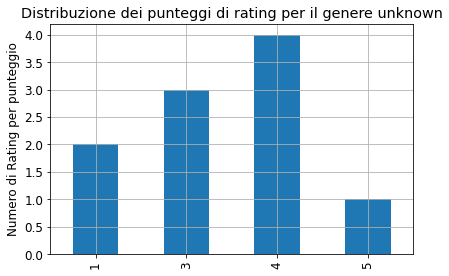

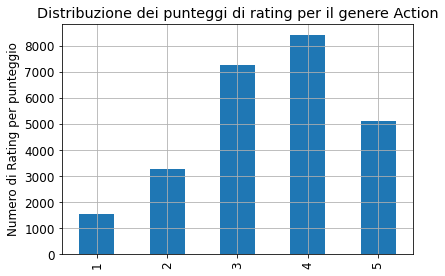

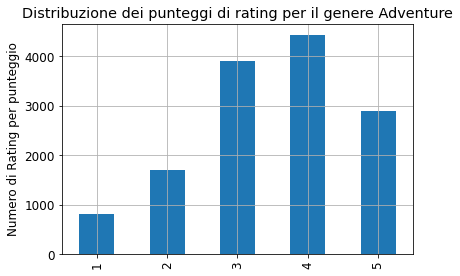

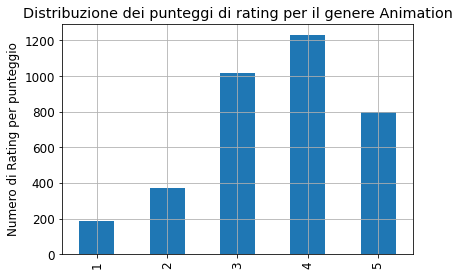

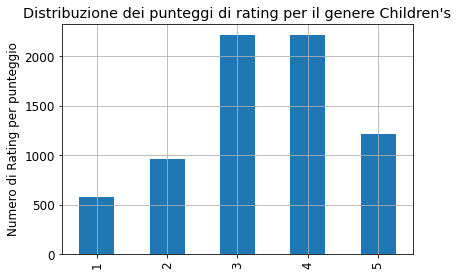

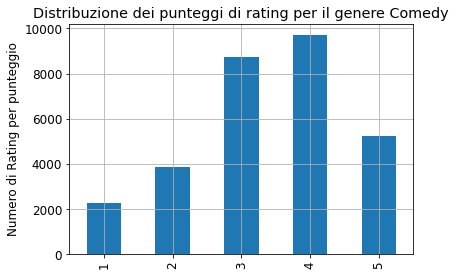

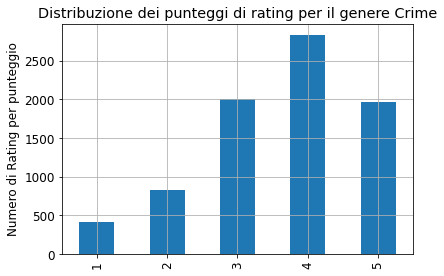

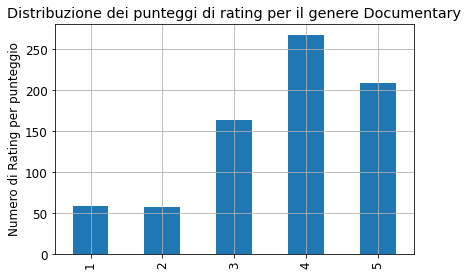

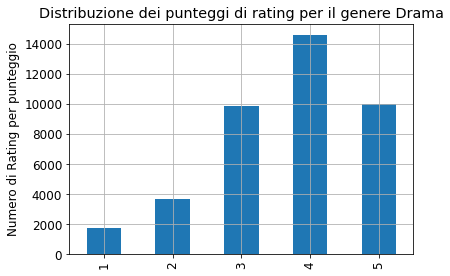

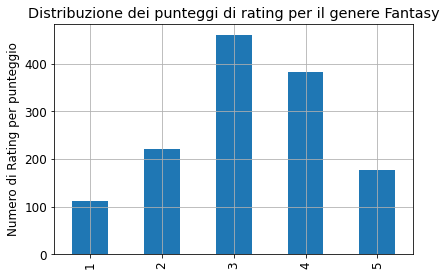

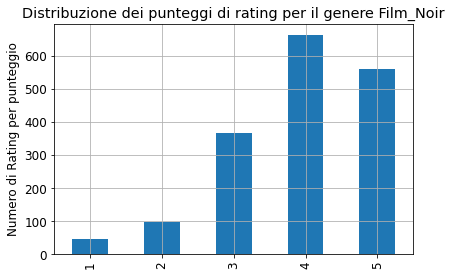

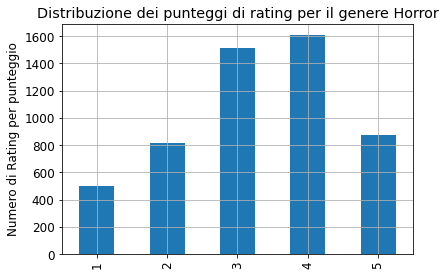

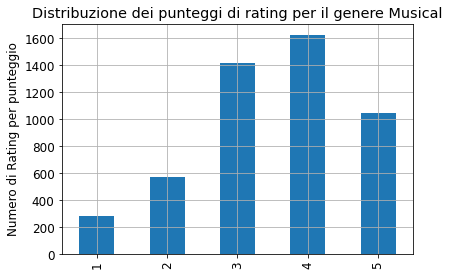

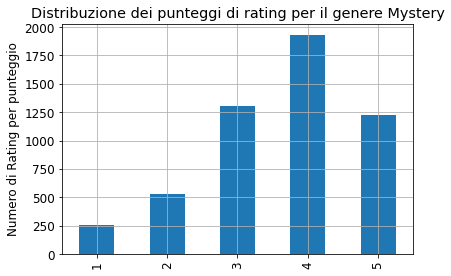

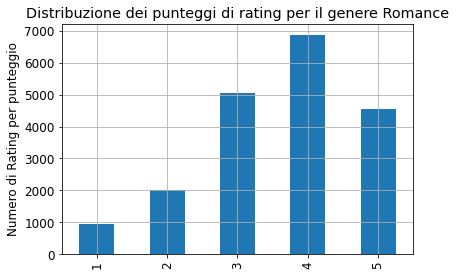

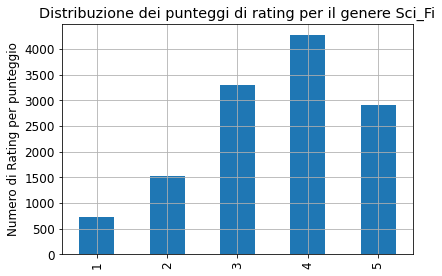

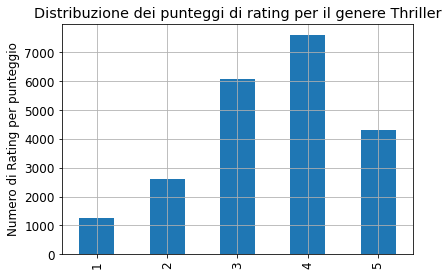

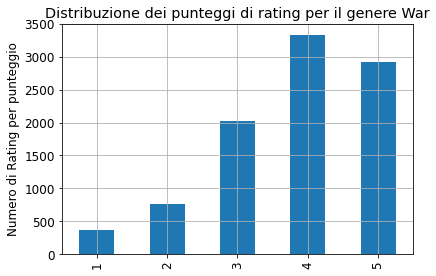

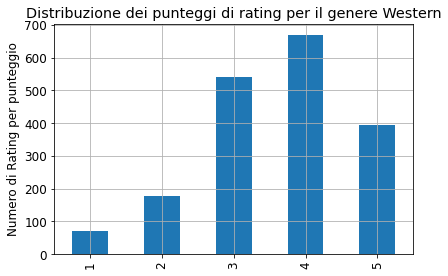

In [23]:
genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]

for g in genres:
    plt.figure()
    selected = merged_df[merged_df[g] == 1]
    selected.rating.value_counts().sort_index().plot(kind='bar')
    plt.title('Distribuzione dei punteggi di rating per il genere ' + str(g))
    plt.ylabel('Numero di Rating per punteggio')
    plt.grid()
    plt.tight_layout()
    
    # Show/save figure as desired.
plt.show()
# Can show all four figures at once by calling plt.show() here, outside the loop.
#plt.show()
    

In [24]:
rating_mean = {}

rating_mean['genres'] = ["All"]
rating_mean['mean_rating'] = [merged_df.rating.mean()]
rating_mean['number'] = [merged_df.item.nunique()]
rating_mean['rating_number'] = [merged_df.item.count()]
rating_mean['rating_number_ratio'] = [merged_df.item.count()/merged_df.item.nunique()]

genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]

print(rating_mean.values())

for g in genres:
    selected = merged_df[merged_df[g] == 1]
    rating_mean['genres'].append(g)
    rating_mean['mean_rating'].append(selected.rating.mean())
    rating_mean['number'].append(selected.item.nunique())
    rating_mean['rating_number'].append(selected.item.count())
    rating_mean['rating_number_ratio'].append(selected.item.count()/selected.item.nunique())

df_genre_mean_rating = pd.DataFrame(data=rating_mean)  
df_genre_mean_rating.head()

dict_values([['All'], [3.52986], [1682], [100000], [59.45303210463734]])


genres  mean_rating  number  rating_number  rating_number_ratio
0        All     3.529860    1682         100000            59.453032
1    unknown     3.200000       2             10             5.000000
2     Action     3.480245     251          25589           101.948207
3  Adventure     3.503527     135          13753           101.874074
4  Animation     3.576699      42           3605            85.833333

Text(0.5, 1.0, 'MEDIA RATING PER GENERE')

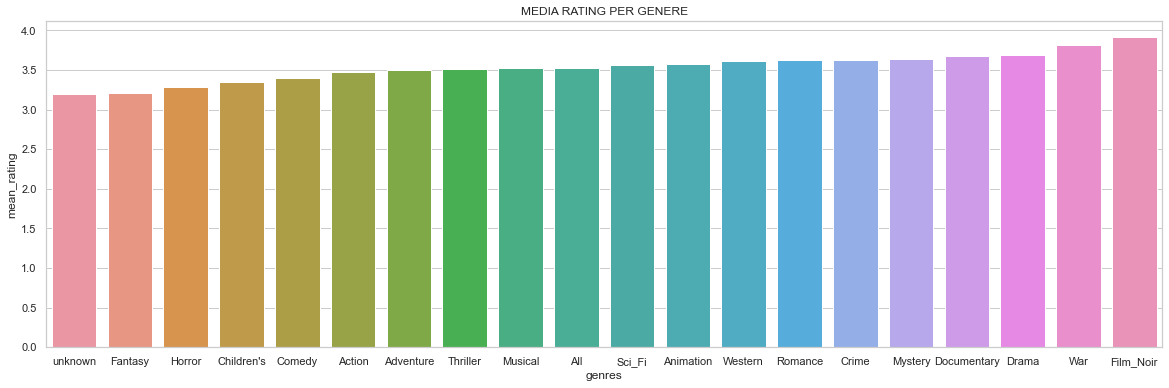

In [25]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="mean_rating", data=df_genre_mean_rating.sort_values("mean_rating"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("MEDIA RATING PER GENERE")

# Non si evidenzia una grossa differenza in base al genere

In [219]:
merged_df[["Drama", "Comedy", "Action", "Thriller", "Romance", "Adventure"]].sum()

Drama        39895
Comedy       29832
Action       25589
Thriller     21872
Romance      19461
Adventure    13753
dtype: int64

In [220]:
merged_df.count()

user                  100000
item                  100000
rating                100000
timestamp             100000
movie_id              100000
movie_title           100000
release_date           99991
video_release_date         0
IMDb_URL               99987
unknown               100000
Action                100000
Adventure             100000
Animation             100000
Children's            100000
Comedy                100000
Crime                 100000
Documentary           100000
Drama                 100000
Fantasy               100000
Film_Noir             100000
Horror                100000
Musical               100000
Mystery               100000
Romance               100000
Sci_Fi                100000
Thriller              100000
War                   100000
Western               100000
user_id               100000
age                   100000
gender                100000
occupation            100000
zip_code              100000
age_range             100000
sentiment     

In [ ]:
merged_df.isnull().any()

Text(0.5, 1.0, 'NUMERO DI VALUTAZIONI PER GENERE')

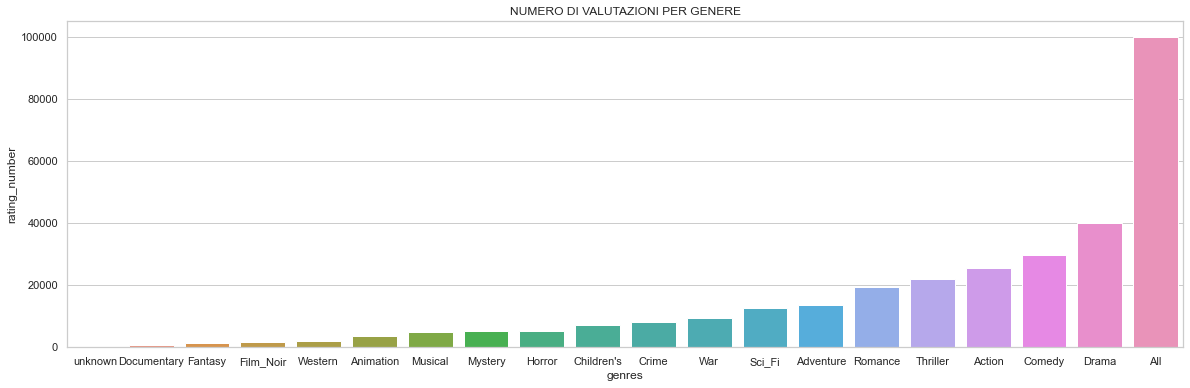

In [26]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number", data=df_genre_mean_rating.sort_values("rating_number"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("NUMERO DI VALUTAZIONI PER GENERE")

Text(0.5, 1.0, 'NUMERO DI FILM PER OGNI GENERE')

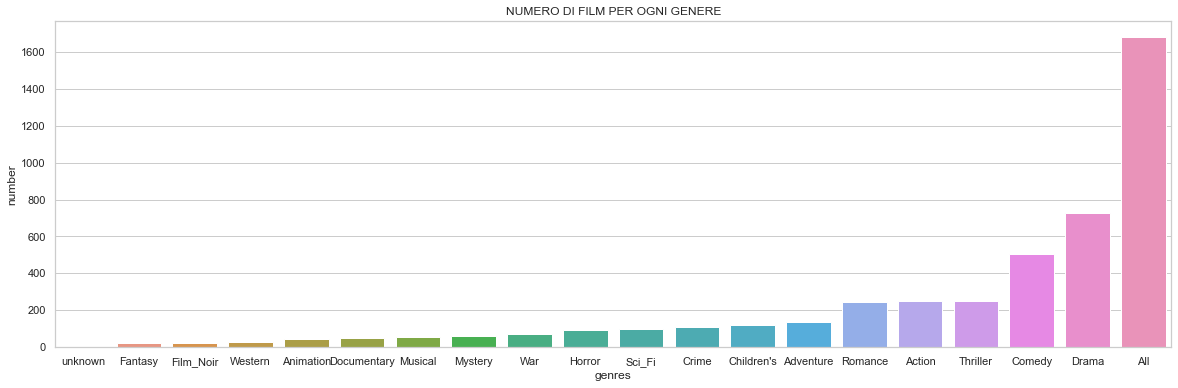

In [27]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="number", data=df_genre_mean_rating.sort_values("number"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("NUMERO DI FILM PER OGNI GENERE")

Text(0.5, 1.0, "FILM PIU' VALUTATI")

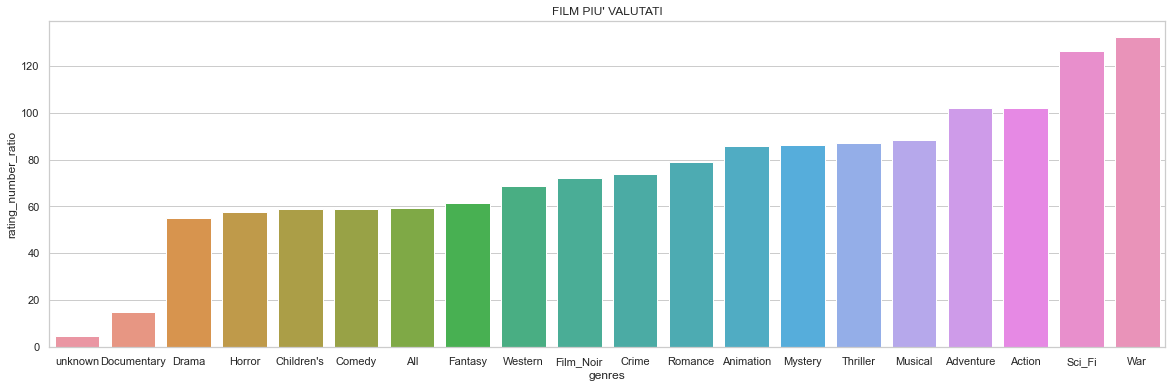

In [28]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number_ratio", data=df_genre_mean_rating.sort_values("rating_number_ratio"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("FILM PIU' VALUTATI")

In [29]:
merged_df = pd.merge(merged_df, user_df, left_on='user', right_on='user_id')
merged_df.head()

user  item  rating  timestamp  movie_id  \
0   196   242       3  881250949       242   
1   196   257       2  881251577       257   
2   196   111       4  881251793       111   
3   196    25       4  881251955        25   
4   196   382       4  881251843       382   

                                         movie_title release_date  \
0                                       Kolya (1996)  24-Jan-1997   
1                                Men in Black (1997)  04-Jul-1997   
2                Truth About Cats & Dogs, The (1996)  26-Apr-1996   
3                               Birdcage, The (1996)  08-Mar-1996   
4  Adventures of Priscilla, Queen of the Desert, ...  01-Jan-1994   

   video_release_date                                           IMDb_URL  \
0                 NaN    http://us.imdb.com/M/title-exact?Kolya%20(1996)   
1                 NaN  http://us.imdb.com/M/title-exact?Men+in+Black+...   
2                 NaN  http://us.imdb.com/M/title-exact?Truth%20About...   
3                 NaN  http://us.imdb.com/M/title-exact?Birdcage,%20T...   
4                 NaN  http://us.imdb.com/M/title-exact?Adventures%20...   

   unknown  ...  Romance  Sci_Fi  Thriller  War  Western  user_id  age  \
0        0  ...        0       0         0    0        0      196   49   
1        0  ...        0       1         0    0        0      196   49   
2        0  ...        1       0         0    0        0      196   49   
3        0  ...        0       0         0    0        0      196   49   
4        0  ...        0       0         0    0        0      196   49   

   gender  occupation  zip_code  
0       M      writer     55105  
1       M      writer     55105  
2       M      writer     55105  
3       M      writer     55105  
4       M      writer     55105  

[5 rows x 33 columns]

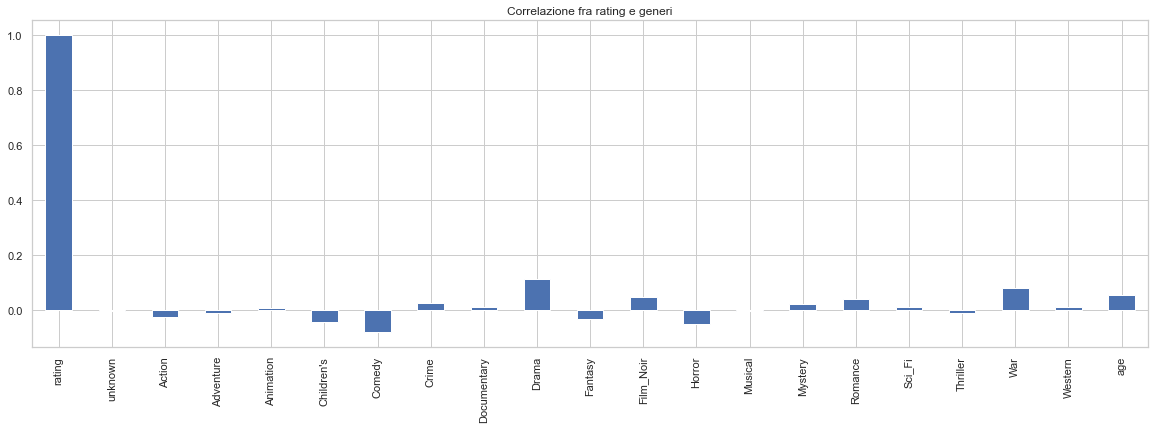

In [126]:
corr_columns = ["rating", "unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western", "age"]

merged_df[corr_columns].corr(method='pearson')['rating'][:].plot(kind='bar')
plt.title("Correlazione fra rating e generi")
fig = plt.gcf()
fig.set_size_inches(20, 6)

# Nessuna correlazione significatica fra rating e le altre colonne

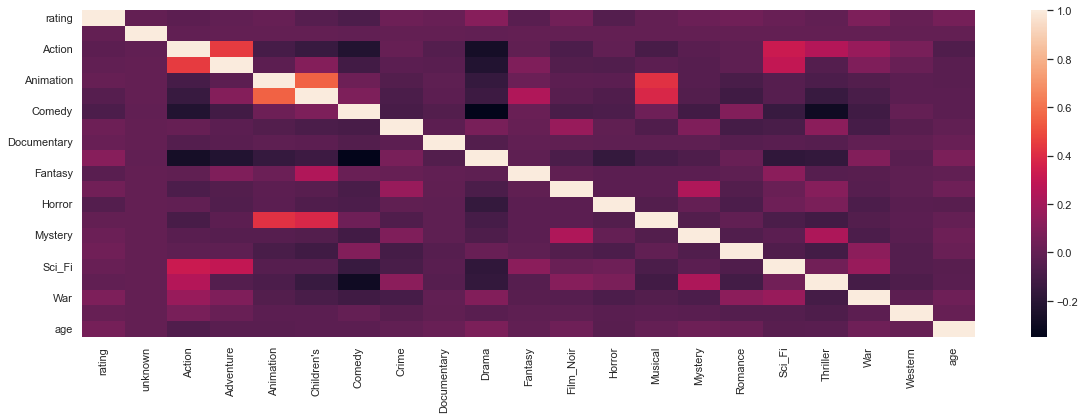

In [31]:


sns.heatmap(merged_df[corr_columns].corr(method='pearson'))
fig = plt.gcf()
fig.set_size_inches(20, 6)

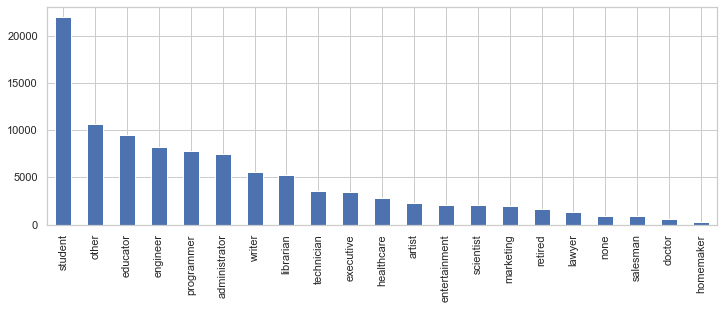

In [32]:
merged_df.occupation.value_counts().sort_values(ascending=False).plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(12, 4)

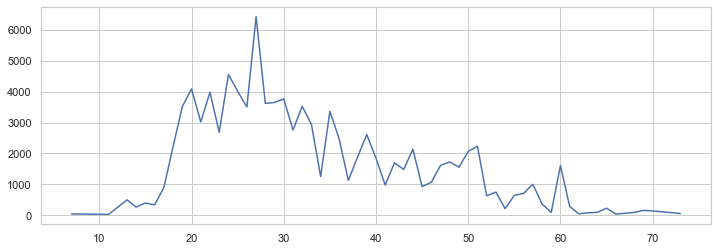

In [33]:
merged_df.age.value_counts().sort_index(ascending=True).plot(kind='line')
fig = plt.gcf()
fig.set_size_inches(12, 4)

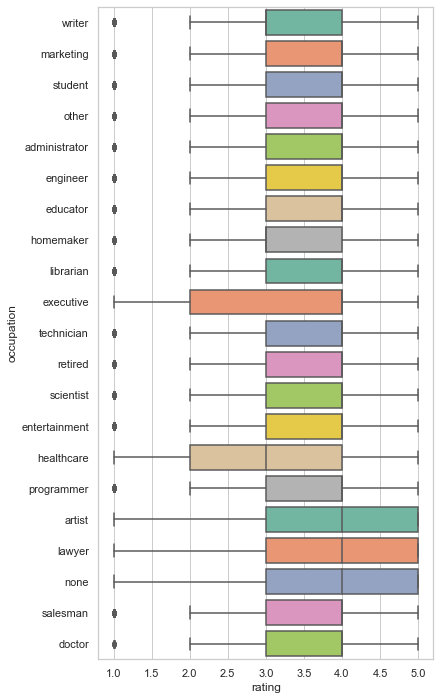

In [34]:
ax = sns.boxplot(x="rating", y="occupation", data=merged_df, orient="h", palette='Set2')

fig = plt.gcf()
fig.set_size_inches(6, 12)

In [35]:
def get_age_range(age):
    
    if age <= 13:
        return "children"
    elif age > 13 and age < 19:
        return "teenager"
    elif age >= 19 and age < 24:
        return "young-adult"
    elif age >= 25 and age < 35:
        return "adult"
    elif age >= 35 and age < 45:
        return "middle-age"
    elif age >= 45 and age < 65:
        return "old-adult"
    else:
        return "old"


merged_df["age_range"] = merged_df.age.apply(lambda x: get_age_range(x))

merged_df.head()

user  item  rating  timestamp  movie_id  \
0   196   242       3  881250949       242   
1   196   257       2  881251577       257   
2   196   111       4  881251793       111   
3   196    25       4  881251955        25   
4   196   382       4  881251843       382   

                                         movie_title release_date  \
0                                       Kolya (1996)  24-Jan-1997   
1                                Men in Black (1997)  04-Jul-1997   
2                Truth About Cats & Dogs, The (1996)  26-Apr-1996   
3                               Birdcage, The (1996)  08-Mar-1996   
4  Adventures of Priscilla, Queen of the Desert, ...  01-Jan-1994   

   video_release_date                                           IMDb_URL  \
0                 NaN    http://us.imdb.com/M/title-exact?Kolya%20(1996)   
1                 NaN  http://us.imdb.com/M/title-exact?Men+in+Black+...   
2                 NaN  http://us.imdb.com/M/title-exact?Truth%20About...   
3                 NaN  http://us.imdb.com/M/title-exact?Birdcage,%20T...   
4                 NaN  http://us.imdb.com/M/title-exact?Adventures%20...   

   unknown  ...  Sci_Fi  Thriller  War  Western  user_id  age  gender  \
0        0  ...       0         0    0        0      196   49       M   
1        0  ...       1         0    0        0      196   49       M   
2        0  ...       0         0    0        0      196   49       M   
3        0  ...       0         0    0        0      196   49       M   
4        0  ...       0         0    0        0      196   49       M   

   occupation  zip_code  age_range  
0      writer     55105  old-adult  
1      writer     55105  old-adult  
2      writer     55105  old-adult  
3      writer     55105  old-adult  
4      writer     55105  old-adult  

[5 rows x 34 columns]

<AxesSubplot:xlabel='age_range'>

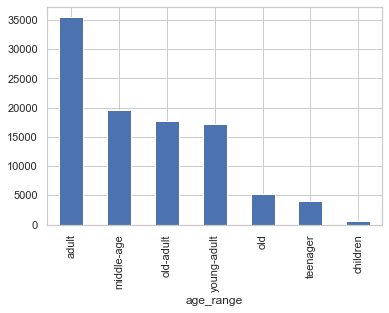

In [167]:
merged_df.value_counts("age_range").plot(kind='bar')

In [98]:
def get_sentiment(rating):
    if rating > 3:
        return "Top"
    elif rating == 3:
        return "Like"
    else:
        return "Dislike"

merged_df["sentiment"] = merged_df.rating.apply(lambda x: get_sentiment(x))

merged_df.head()

user  item  rating  timestamp  movie_id  \
0   196   242       3  881250949       242   
1   196   257       2  881251577       257   
2   196   111       4  881251793       111   
3   196    25       4  881251955        25   
4   196   382       4  881251843       382   

                                         movie_title release_date  \
0                                       Kolya (1996)  24-Jan-1997   
1                                Men in Black (1997)  04-Jul-1997   
2                Truth About Cats & Dogs, The (1996)  26-Apr-1996   
3                               Birdcage, The (1996)  08-Mar-1996   
4  Adventures of Priscilla, Queen of the Desert, ...  01-Jan-1994   

   video_release_date                                           IMDb_URL  \
0                 NaN    http://us.imdb.com/M/title-exact?Kolya%20(1996)   
1                 NaN  http://us.imdb.com/M/title-exact?Men+in+Black+...   
2                 NaN  http://us.imdb.com/M/title-exact?Truth%20About...   
3                 NaN  http://us.imdb.com/M/title-exact?Birdcage,%20T...   
4                 NaN  http://us.imdb.com/M/title-exact?Adventures%20...   

   unknown  ...  user_id  age  gender  occupation  zip_code  age_range  \
0        0  ...      196   49       M      writer     55105  old-adult   
1        0  ...      196   49       M      writer     55105  old-adult   
2        0  ...      196   49       M      writer     55105  old-adult   
3        0  ...      196   49       M      writer     55105  old-adult   
4        0  ...      196   49       M      writer     55105  old-adult   

   sentiment                           genre  review_number  \
0       Like                          Comedy            117   
1    Dislike  Action_Adventure_Comedy_Sci_Fi            303   
2        Top                  Comedy_Romance            272   
3        Top                          Comedy            293   
4        Top                    Comedy_Drama            111   

   user_review_number  
0                  39  
1                  39  
2                  39  
3                  39  
4                  39  

[5 rows x 38 columns]

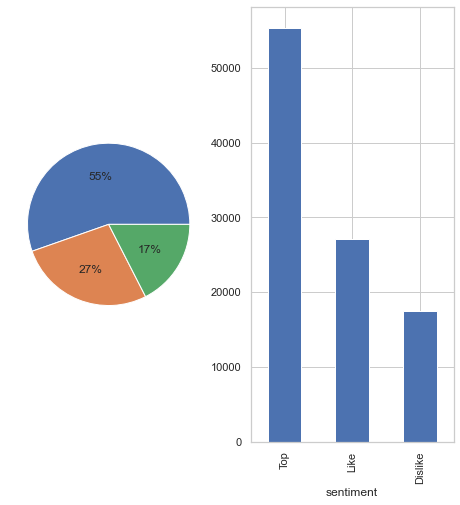

In [100]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
#merged_df.value_counts("gender").plot.pie(figsize=(8, 8))
plt.pie(merged_df.value_counts("sentiment"),  autopct='%.0f%%')

plt.subplot(1, 2, 2) # index 2
merged_df.value_counts("sentiment").plot.bar(figsize=(8, 8))

plt.subplot(1, 2, 5) # index 2
merged_df.rating.order_value().plot.bar(figsize=(8, 8))

plt.show()


# Sarà più facile escludere che consigliare

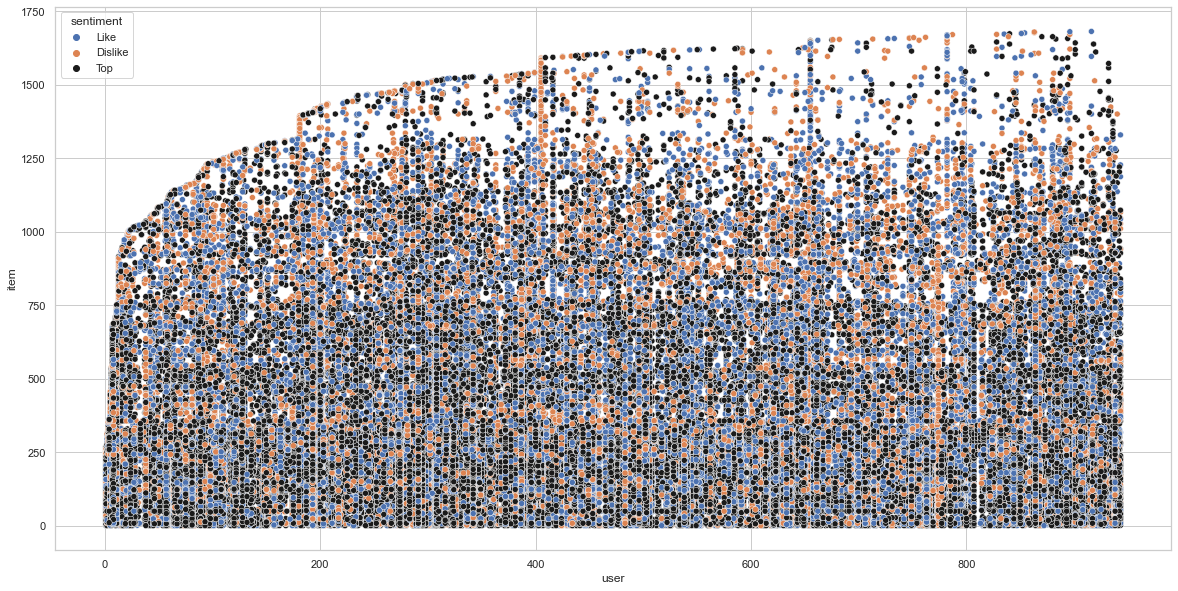

In [99]:
markers = {"Top": "s", "Dislike": "X", "Neutral": "o"}

sns.scatterplot(data=merged_df, x="user", y="item", hue="sentiment", palette=["C0", "C1", "k"])

fig = plt.gcf()
fig.set_size_inches(20, 10)

In [38]:
genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]





        

In [39]:
def get_genre(row):

    genres = ["unknown","Action","Adventure","Animation",
        "Children's","Comedy","Crime","Documentary","Drama","Fantasy",
        "Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
        "Thriller","War","Western"]
    genre_list = []
    for col in genres:
        if row[col] == 1:
            genre_list.append(col)
    
    
    genre = ""
    
    genre_list.sort()
    
    for g in genre_list:
        if genre == "":
            genre += g
        else:
            genre += "_" + g
    
    return genre




merged_df["genre"] = merged_df.apply(lambda row: get_genre(row), axis = 1)

merged_df.head()

user  item  rating  timestamp  movie_id  \
0   196   242       3  881250949       242   
1   196   257       2  881251577       257   
2   196   111       4  881251793       111   
3   196    25       4  881251955        25   
4   196   382       4  881251843       382   

                                         movie_title release_date  \
0                                       Kolya (1996)  24-Jan-1997   
1                                Men in Black (1997)  04-Jul-1997   
2                Truth About Cats & Dogs, The (1996)  26-Apr-1996   
3                               Birdcage, The (1996)  08-Mar-1996   
4  Adventures of Priscilla, Queen of the Desert, ...  01-Jan-1994   

   video_release_date                                           IMDb_URL  \
0                 NaN    http://us.imdb.com/M/title-exact?Kolya%20(1996)   
1                 NaN  http://us.imdb.com/M/title-exact?Men+in+Black+...   
2                 NaN  http://us.imdb.com/M/title-exact?Truth%20About...   
3                 NaN  http://us.imdb.com/M/title-exact?Birdcage,%20T...   
4                 NaN  http://us.imdb.com/M/title-exact?Adventures%20...   

   unknown  ...  War  Western  user_id  age  gender  occupation  zip_code  \
0        0  ...    0        0      196   49       M      writer     55105   
1        0  ...    0        0      196   49       M      writer     55105   
2        0  ...    0        0      196   49       M      writer     55105   
3        0  ...    0        0      196   49       M      writer     55105   
4        0  ...    0        0      196   49       M      writer     55105   

   age_range  sentiment                           genre  
0  old-adult    Neutral                          Comedy  
1  old-adult    Dislike  Action_Adventure_Comedy_Sci_Fi  
2  old-adult       Like                  Comedy_Romance  
3  old-adult       Like                          Comedy  
4  old-adult       Like                    Comedy_Drama  

[5 rows x 36 columns]

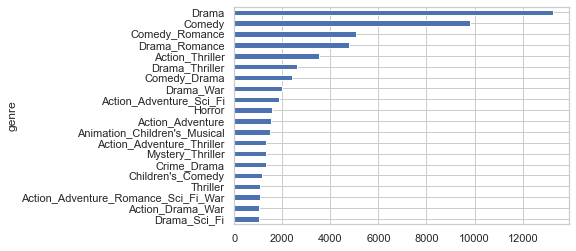

In [40]:
merged_df.groupby("genre").count().item.sort_values(ascending=False)[0:20].plot.barh()
plt.gca().invert_yaxis()

In [41]:
children_genres = {}

df_children_like = merged_df[(merged_df["age_range"] == "children") & (merged_df["sentiment"] == "Like")]

children_genres['genres'] = []

children_genres['item_number'] = []
children_genres['rating_number'] = []
children_genres['rating_number_ratio'] = []

genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]



for g in genres:
    selected = df_children_like[df_children_like[g] == 1]
    
    children_genres['genres'].append(g)

    children_genres['item_number'].append(selected.item.nunique())
    children_genres['rating_number'].append(selected.item.count())
    children_genres['rating_number_ratio'].append(selected.item.count()/selected.item.nunique())

df_children_genres_rating = pd.DataFrame(data=children_genres)  
df_children_genres_rating.head()

C:\Users\samue\AppData\Local\Temp/ipykernel_2776/1670552972.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  children_genres['rating_number_ratio'].append(selected.item.count()/selected.item.nunique())


genres  item_number  rating_number  rating_number_ratio
0     unknown            0              0                  NaN
1      Action           73             97             1.328767
2   Adventure           25             42             1.680000
3   Animation           14             17             1.214286
4  Children's           25             30             1.200000

Text(0.5, 1.0, "FILM PIU' VALUTATI")

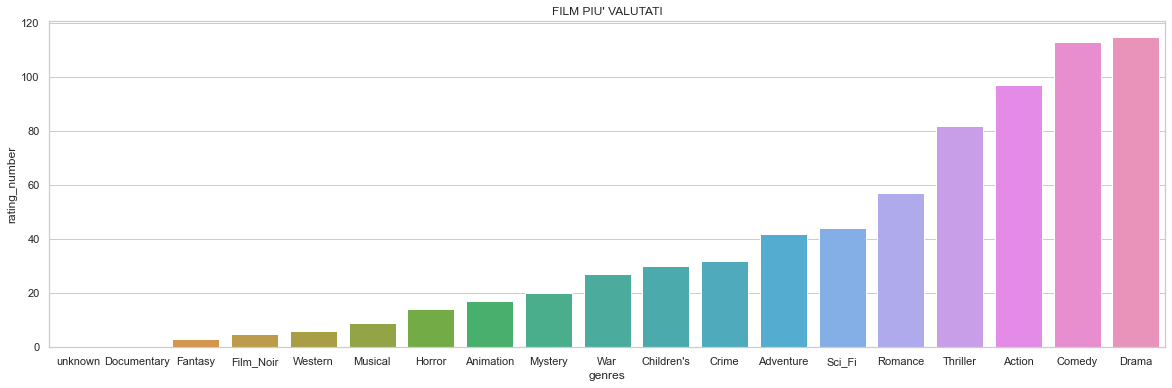

In [42]:



sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number",  data=df_children_genres_rating.sort_values("rating_number"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("FILM PIU' VALUTATI")

Text(0.5, 1.0, "FILM PIU' VALUTATI DALLA FASCIA CHILDREN IN RAPPORTO AL NUMERO DI FILM PER CATEGORIA")

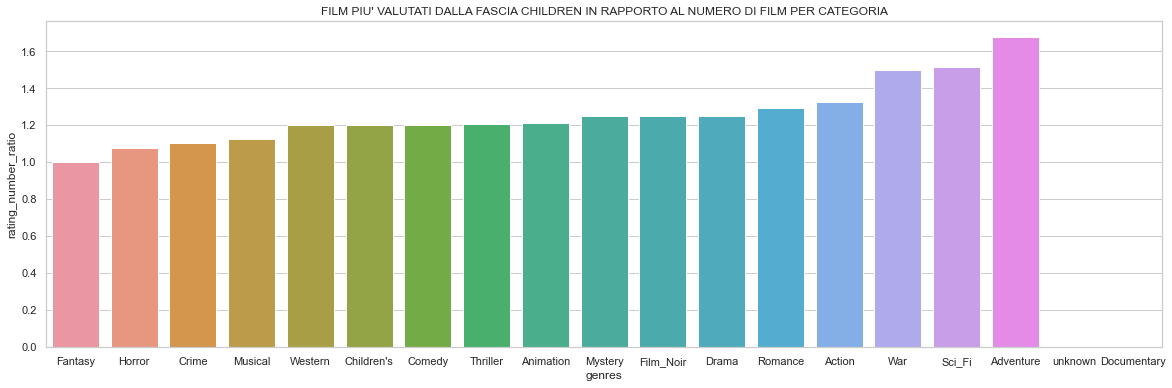

In [43]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number_ratio",  data=df_children_genres_rating.sort_values("rating_number_ratio"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("FILM PIU' VALUTATI DALLA FASCIA CHILDREN IN RAPPORTO AL NUMERO DI FILM PER CATEGORIA")

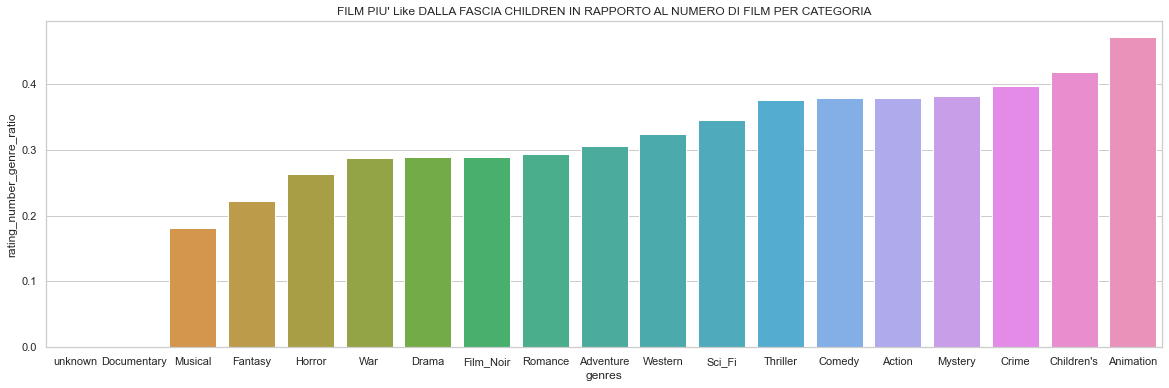

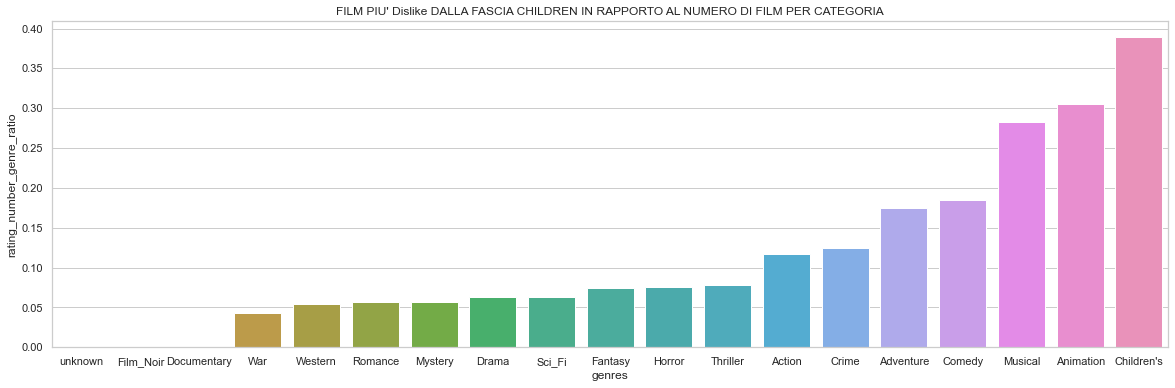

<Figure size 432x288 with 0 Axes>

In [44]:
for sentiment in ["Like", "Dislike"]:


    children_genres = {}

    df_children_like = merged_df[(merged_df["age_range"] == "children") & (merged_df["sentiment"] == sentiment)]

    children_genres['genres'] = []

    children_genres['tot_number_genre'] = []
    children_genres['rating_number'] = []
    children_genres['rating_number_genre_ratio'] = []

    genres = ["unknown","Action","Adventure","Animation",
    "Children's","Comedy","Crime","Documentary","Drama","Fantasy",
    "Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
    "Thriller","War","Western"]



    for g in genres:
        
        tot_number_genre = merged_df[merged_df[g] == 1].item.count()
        
        selected = df_children_like[df_children_like[g] == 1]

        children_genres['genres'].append(g)
        
        children_genres['tot_number_genre'] = tot_number_genre
        
        children_genres['rating_number'].append(selected.item.count())
        
        children_genres['rating_number_genre_ratio'].append((selected.item.count()/tot_number_genre)*100)

    df_children_genres_rating = pd.DataFrame(data=children_genres)  
    df_children_genres_rating.head()
    
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="genres", y="rating_number_genre_ratio",  data=df_children_genres_rating.sort_values("rating_number_genre_ratio"))
    fig = plt.gcf()
    fig.set_size_inches(20, 6)
    plt.title(f"FILM PIU' {sentiment} DALLA FASCIA CHILDREN IN RAPPORTO AL NUMERO DI FILM PER CATEGORIA")
    plt.figure()

plt.show()

In [45]:
merged_df.columns

Index(['user', 'item', 'rating', 'timestamp', 'movie_id', 'movie_title',
       'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western', 'user_id',
       'age', 'gender', 'occupation', 'zip_code', 'age_range', 'sentiment',
       'genre'],
      dtype='object')

Text(0.5, 1.0, 'CORRELAZIONE FRA I GENERI FILMATOGRAFICI')

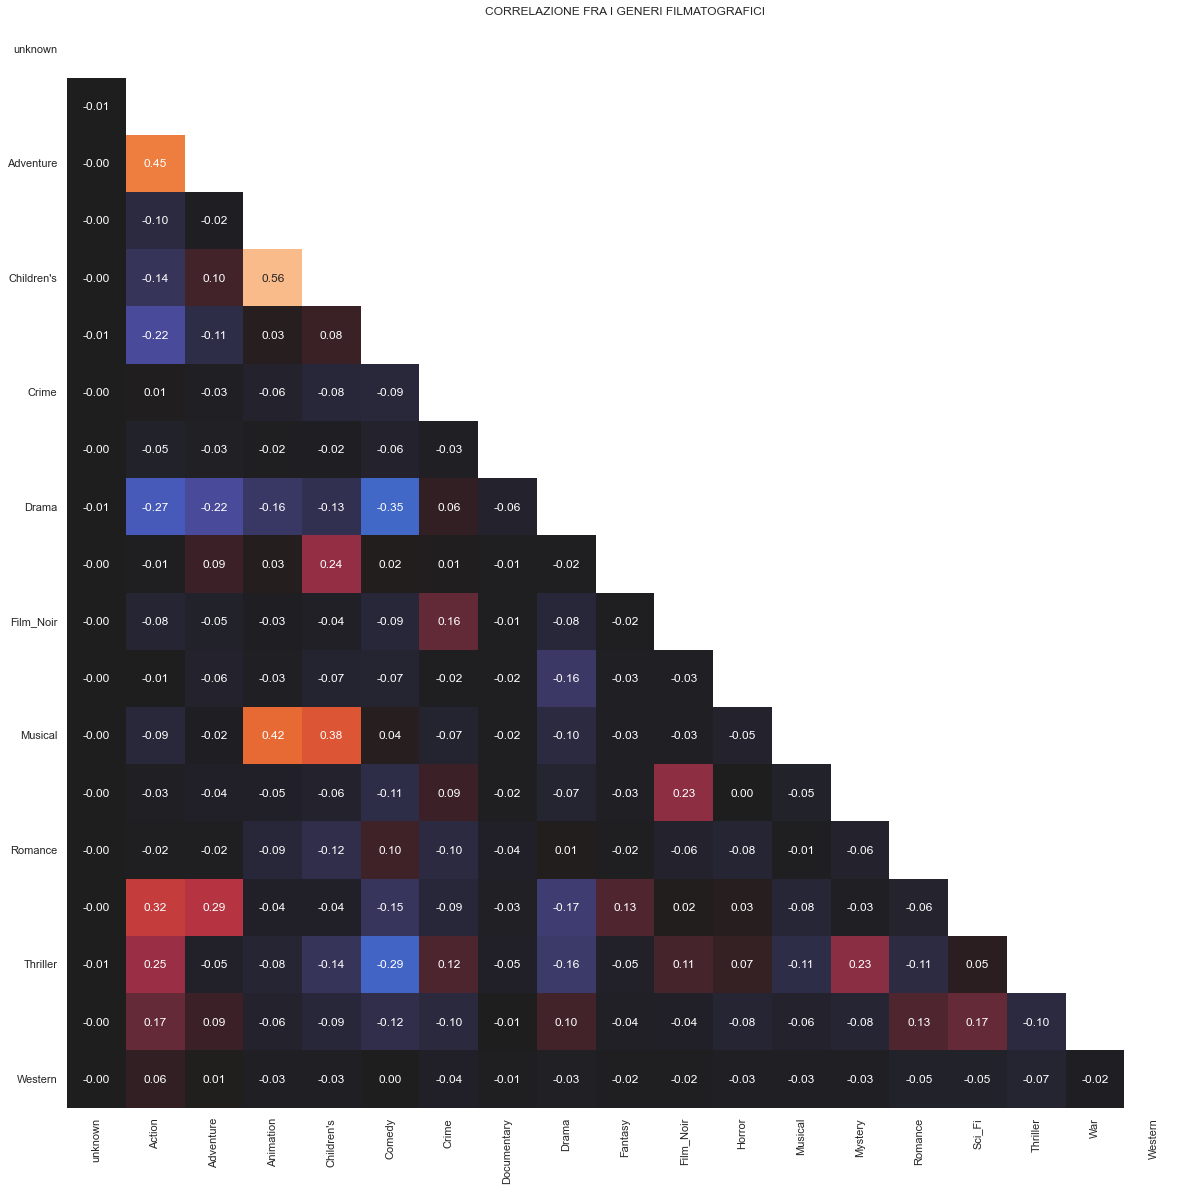

In [46]:
col = ["unknown", "Action",
       "Adventure", "Animation", "Children's", "Comedy", "Crime",
       "Documentary", "Drama", "Fantasy", "Film_Noir", "Horror", "Musical",
       "Mystery", "Romance", "Sci_Fi", "Thriller", "War", "Western"]


sns.heatmap(merged_df[col].corr(),
            vmin=-0.3,
            vmax=0.6,
            center=0,
            annot=True,
            fmt='.2f',
            mask=~np.tri(merged_df[col].corr().shape[1], k=-1, dtype=bool),
            cbar=False)
 
fig = plt.gcf()
fig.set_size_inches(20, 20)

plt.title("CORRELAZIONE FRA I GENERI FILMATOGRAFICI")

['Adventure', 'Action', "Children's", 'Musical', 'Animation', 'Animation']


Text(0.5, 1.0, 'GENERI CON CORRELAZIONE ASSOLUTA MAGGIORE DI 0.4')

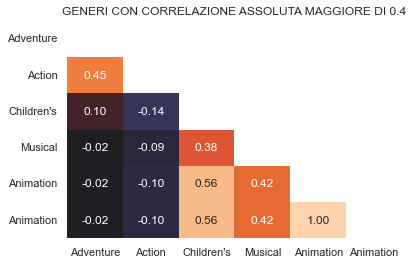

In [47]:
col = ["unknown", "Action",
       "Adventure", "Animation", "Children's", "Comedy", "Crime",
       "Documentary", "Drama", "Fantasy", "Film_Noir", "Horror", "Musical",
       "Mystery", "Romance", "Sci_Fi", "Thriller", "War", "Western"]


gen_corr = [] # , hue="sentiment", palette=["C0", "C1", "k"]

for index, row in merged_df[col].corr().iterrows():
    for c in col:
        if (row[c] >= 0.4 and row[c] < 1) or (row[c] <= -0.4 and row[c] > -1):
            gen_corr.append(c)
            




print(gen_corr)
sns.heatmap(merged_df[gen_corr].corr(),
            vmin=-0.3,
            vmax=0.6,
            center=0,
            annot=True,
            fmt='.2f',
            mask=~np.tri(merged_df[gen_corr].corr().shape[1], k=-1, dtype=bool),
            cbar=False)

plt.title("GENERI CON CORRELAZIONE ASSOLUTA MAGGIORE DI 0.4")

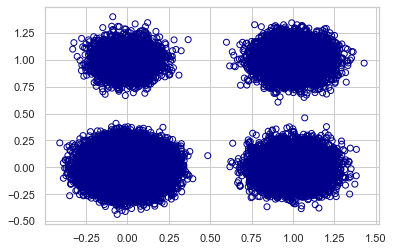

In [366]:
plt.scatter(
    x=merged_df["Action"] + np.random.normal(scale=0.1, size=100000),
    y=merged_df["Adventure"] + np.random.normal(scale=0.1, size=100000),
    c='none',
    edgecolor='darkblue'
)

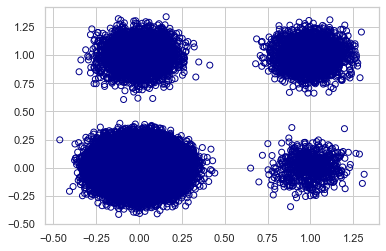

In [365]:
plt.scatter(
    x=merged_df["Animation"] + np.random.normal(scale=0.1, size=100000),
    y=merged_df["Children's"] + np.random.normal(scale=0.1, size=100000),
    c='none',
    edgecolor='darkblue'
)

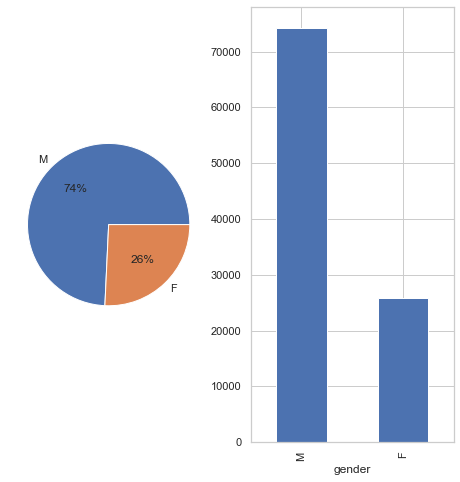

In [48]:


plt.subplot(1, 2, 1) # row 1, col 2 index 1
#merged_df.value_counts("gender").plot.pie(figsize=(8, 8))
plt.pie(merged_df.value_counts("gender"), labels= merged_df.gender.unique(), autopct='%.0f%%')

plt.subplot(1, 2, 2) # index 2
merged_df.value_counts("gender").plot.bar(figsize=(8, 8))

plt.show()

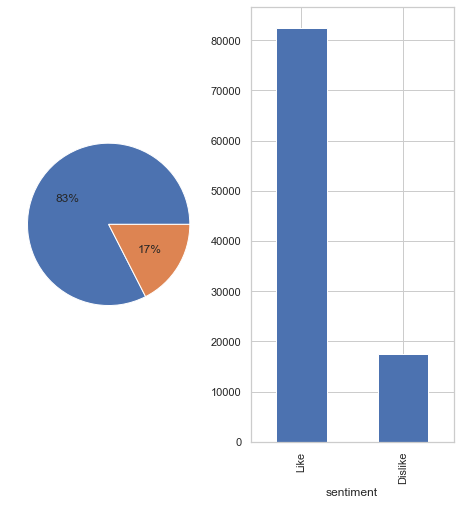

In [97]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
#merged_df.value_counts("gender").plot.pie(figsize=(8, 8))
plt.pie(merged_df.value_counts("sentiment"),  autopct='%.0f%%')

plt.subplot(1, 2, 2) # index 2
merged_df.value_counts("sentiment").plot.bar(figsize=(8, 8))

plt.show()

In [50]:
item_df = item_df.set_index("movie_id")

In [51]:
ten_popular_movies_id = merged_df[merged_df["rating"] == 5].value_counts("item").sort_values(ascending=False).head(10).index

print(ten_popular_movies_id)

item_df.head()

item_df.iloc[ten_popular_movies_id].movie_title

Int64Index([50, 100, 127, 174, 56, 318, 98, 313, 172, 181], dtype='int64', name='item')


movie_id
51                      Legends of the Fall (1994)
101                             Heavy Metal (1981)
128                                Supercop (1992)
175                                  Brazil (1985)
57                                   Priest (1994)
319                Everyone Says I Love You (1996)
99          Snow White and the Seven Dwarfs (1937)
314    3 Ninjas: High Noon At Mega Mountain (1998)
173                     Princess Bride, The (1987)
182                              GoodFellas (1990)
Name: movie_title, dtype: object

In [52]:
ten_baddest_movie = merged_df[merged_df["rating"] == 1].value_counts("item").sort_values(ascending=False).head(10).index

print(ten_baddest_movie)

item_df.head()

item_df.iloc[ten_baddest_movie].movie_title

Int64Index([294, 289, 325, 243, 240, 235, 288, 260, 748, 286], dtype='int64', name='item')


movie_id
295                    Breakdown (1997)
290             Fierce Creatures (1997)
326                    G.I. Jane (1997)
244       Smilla's Sense of Snow (1997)
241    Last of the Mohicans, The (1992)
236                 Citizen Ruth (1996)
289                        Evita (1996)
261                      Air Bud (1997)
749              MatchMaker, The (1997)
287                Marvin's Room (1996)
Name: movie_title, dtype: object

In [53]:
grouped_item = merged_df.groupby("item").count()

def get_review_number(id):
    
    return grouped_item.loc[id].user
    




merged_df["review_number"] = merged_df.item.apply(lambda id: get_review_number(id))

merged_df["review_number"]

0        117
1        303
2        272
3        293
4        111
        ... 
99995    350
99996    175
99997     27
99998    143
99999     52
Name: review_number, Length: 100000, dtype: int64

In [54]:
merged_df[merged_df["item"] == 1][["item", "user", "review_number"]]

item  user  review_number
43        1    63            452
270       1   296            452
444       1   271            452
721       1   201            452
1097      1   209            452
...     ...   ...            ...
97462     1   789            452
97495     1   785            452
97522     1   609            452
97550     1   412            452
97601     1   822            452

[452 rows x 3 columns]

In [55]:
grouped_user = merged_df.groupby("user").count()

def get_user_review_number(id):
    
    return grouped_user.loc[id].user_id
    




merged_df["user_review_number"] = merged_df.user_id.apply(lambda id: get_user_review_number(id))

merged_df[["item", "user", "review_number", "user_review_number"]]

item  user  review_number  user_review_number
0       242   196            117                  39
1       257   196            303                  39
2       111   196            272                  39
3        25   196            293                  39
4       382   196            111                  39
...     ...   ...            ...                 ...
99995   313   873            350                  20
99996   326   873            175                  20
99997   348   873             27                  20
99998   358   873            143                  20
99999   342   873             52                  20

[100000 rows x 4 columns]

In [56]:
merged_df[["item", "user", "review_number", "user_review_number"]]

item  user  review_number  user_review_number
0       242   196            117                  39
1       257   196            303                  39
2       111   196            272                  39
3        25   196            293                  39
4       382   196            111                  39
...     ...   ...            ...                 ...
99995   313   873            350                  20
99996   326   873            175                  20
99997   348   873             27                  20
99998   358   873            143                  20
99999   342   873             52                  20

[100000 rows x 4 columns]

In [61]:
merged_df.columns

Index(['user', 'item', 'rating', 'timestamp', 'movie_id', 'movie_title',
       'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western', 'user_id',
       'age', 'gender', 'occupation', 'zip_code', 'age_range', 'sentiment',
       'genre', 'review_number', 'user_review_number'],
      dtype='object')

In [70]:
merged_df[merged_df['movie_title'].str.contains("ape")]

user  item  rating  timestamp  movie_id  \
225     154   708       4  879139003       708   
521     271    65       3  885849419        65   
523     271   218       3  885849087       218   
530     271   520       5  885848615       520   
624     271  1133       3  885849536      1133   
...     ...   ...     ...        ...       ...   
98148   814   218       3  885411030       218   
98193   372   218       5  876869481       218   
98328   333   520       4  891045117       520   
98445   925   218       4  884717862       218   
99893   358    65       4  891270405        65   

                              movie_title release_date  video_release_date  \
225       Sex, Lies, and Videotape (1989)  01-Jan-1989                 NaN   
521    What's Eating Gilbert Grape (1993)  01-Jan-1993                 NaN   
523                      Cape Fear (1991)  01-Jan-1991                 NaN   
530              Great Escape, The (1963)  01-Jan-1963                 NaN   
624       Escape to Witch Mountain (1975)  01-Jan-1975                 NaN   
...                                   ...          ...                 ...   
98148                    Cape Fear (1991)  01-Jan-1991                 NaN   
98193                    Cape Fear (1991)  01-Jan-1991                 NaN   
98328            Great Escape, The (1963)  01-Jan-1963                 NaN   
98445                    Cape Fear (1991)  01-Jan-1991                 NaN   
99893  What's Eating Gilbert Grape (1993)  01-Jan-1993                 NaN   

                                                IMDb_URL  unknown  ...  \
225    http://us.imdb.com/M/title-exact?sex,%20lies,%...        0  ...   
521    http://us.imdb.com/M/title-exact?What's%20Eati...        0  ...   
523    http://us.imdb.com/M/title-exact?Cape%20Fear%2...        0  ...   
530    http://us.imdb.com/M/title-exact?Great%20Escap...        0  ...   
624    http://us.imdb.com/M/title-exact?Escape%20to%2...        0  ...   
...                                                  ...      ...  ...   
98148  http://us.imdb.com/M/title-exact?Cape%20Fear%2...        0  ...   
98193  http://us.imdb.com/M/title-exact?Cape%20Fear%2...        0  ...   
98328  http://us.imdb.com/M/title-exact?Great%20Escap...        0  ...   
98445  http://us.imdb.com/M/title-exact?Cape%20Fear%2...        0  ...   
99893  http://us.imdb.com/M/title-exact?What's%20Eati...        0  ...   

       user_id  age  gender  occupation  zip_code   age_range  sentiment  \
225        154   25       M     student     53703       adult       Like   
521        271   51       M    engineer     22932   old-adult    Neutral   
523        271   51       M    engineer     22932   old-adult    Neutral   
530        271   51       M    engineer     22932   old-adult       Like   
624        271   51       M    engineer     22932   old-adult    Neutral   
...        ...  ...     ...         ...       ...         ...        ...   
98148      814   30       M       other     12345       adult    Neutral   
98193      372   25       F     student     66046       adult       Like   
98328      333   47       M       other     V0R2M   old-adult       Like   
98445      925   18       F    salesman     49036    teenager       Like   
99893      358   40       M    educator     10022  middle-age       Like   

                              genre  review_number  user_review_number  
225                           Drama            101                  51  
521                    Comedy_Drama            115                 278  
523                        Thriller            171                 278  
530                   Adventure_War            124                 278  
624    Adventure_Children's_Fantasy             30                 278  
...                             ...            ...                 ...  
98148                      Thriller            171                  35  
98193                      Thriller            171                  66  
98328     

In [ ]:
def get_rating_score(rating):
    if rating == 5:
        return 3
    elif rating == 4:
        return 2
    elif rating == 3:
        return 1
    elif rating == 2:
        return -2
    else:
        return -3

merged_df["score"] = merged_df.rating.apply(lambda x: get_rating_score(x))

merged_df.head()

In [149]:
genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]



children_like_genres = {}



# DATAFRAMES:
children_like = merged_df[(merged_df["age_range"] == "children") & (merged_df["sentiment"] == "Top")]
children = merged_df[merged_df["age_range"] == 'children']

NUMBER_OF_CHILDREN_LIKE_REVIEW = children_like.item.count()



# ALL CHILDREN

children_like_genres['genres'] = ["CHILDREN"]

# media rating dei children
children_like_genres['mean_rating'] = [children.rating.mean()]

# media pesata per volume del campione
children_like_genres['mean_rating_weighted'] = [children.rating.mean()*children.item.count()/children.item.count()]

#children_like_genres['unique_movie_number'] = [children.item.nunique()]

# numero di like review dei children (tutti i generi)
children_like_genres['rating_number_liked'] = [children_like.item.count()]

# percentuale sul numero totale
children_like_genres['rating_number_percent'] = [children.item.count()/children.item.count()*100]


# tot numero di rating dei children (all sentiment, all genres)
children_like_genres['rating_number'] = [children.item.count()]

# rating like (all generi) / rating tot (all generi)
children_like_genres['rating_number_like_ratio'] = [children_like.item.count()/NUMBER_OF_CHILDREN_LIKE_REVIEW/children.item.count()]


children_like_genres['score_sum'] = [children.score.sum()]



# FOR GENRE:

for g in genres:
    children_like_genre = children_like[children_like[g] == 1]   
    
    childred_genre = children[children[g] == 1]
    
    
    children_like_genres['genres'].append(g)    
    
    # media rating dei children per il genere
    children_like_genres['mean_rating'].append(childred_genre.rating.mean())
    
    
    # media pesata per volume del campione
    children_like_genres['mean_rating_weighted'].append(childred_genre.rating.mean()*childred_genre.item.count()/children.item.count())
    
    # numero di item univoci per genere
    # children_like_genres['unique_movie_number'].append(childred_genre.item.nunique())
    
    
    # numero di rating like per genere
    children_like_genres['rating_number_liked'].append(children_like_genre.item.count())
    
    children_like_genres['rating_number_percent'].append(childred_genre.item.count()/children.item.count()*100)
    
    # tot numero di rating per genere
    children_like_genres['rating_number'].append(childred_genre.item.count())
    
    # rating like / rating tot per genere
    children_like_genres['rating_number_like_ratio'].append(children_like_genre.item.count()/NUMBER_OF_CHILDREN_LIKE_REVIEW/childred_genre.item.count())

    # sum degli score:
    children_like_genres['score_sum'].append(childred_genre.score.sum())
    
    
df_children_genre = pd.DataFrame(data=children_like_genres)  
df_children_genre.head()

C:\Users\samue\AppData\Local\Temp/ipykernel_2776/2906282351.py:80: RuntimeWarning: invalid value encountered in double_scalars
  children_like_genres['rating_number_like_ratio'].append(children_like_genre.item.count()/NUMBER_OF_CHILDREN_LIKE_REVIEW/childred_genre.item.count())


genres  mean_rating  mean_rating_weighted  rating_number_liked  \
0   CHILDREN     3.463211              3.463211                  316   
1    unknown          NaN                   NaN                    0   
2     Action     3.483871              1.083612                   97   
3  Adventure     3.282828              0.543478                   42   
4  Animation     3.083333              0.185619                   17   

   rating_number_percent  rating_number  rating_number_like_ratio  score_sum  
0             100.000000            598                  0.001672        651  
1               0.000000              0                       NaN          0  
2              31.103679            186                  0.001650        216  
3              16.555184             99                  0.001343         79  
4               6.020067             36                  0.001494         17

Text(0.5, 1.0, 'MEDIA RATING CHILDREN PER GENERI')

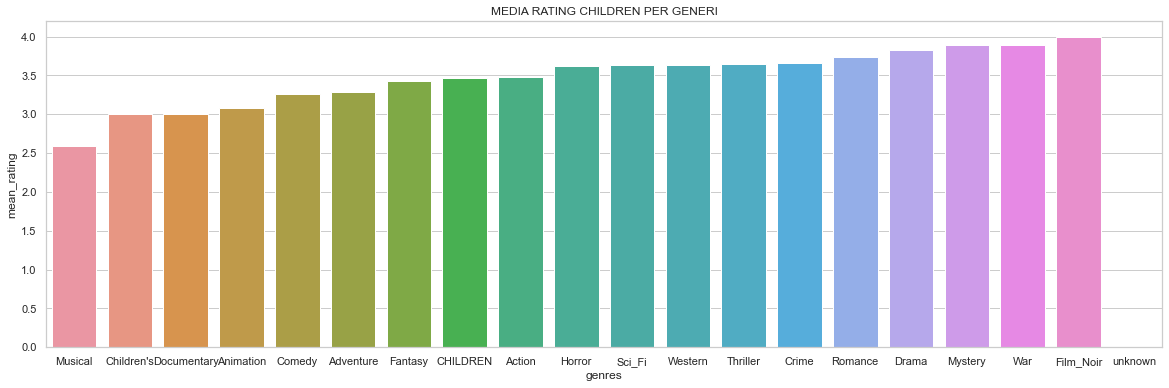

In [77]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="mean_rating",  data=df_children_genre.sort_values("mean_rating"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("MEDIA RATING CHILDREN PER GENERI")

Text(0.5, 1.0, 'NUMERO DI RATING ESPRESSO DAI CHILDREN PER GENERI')

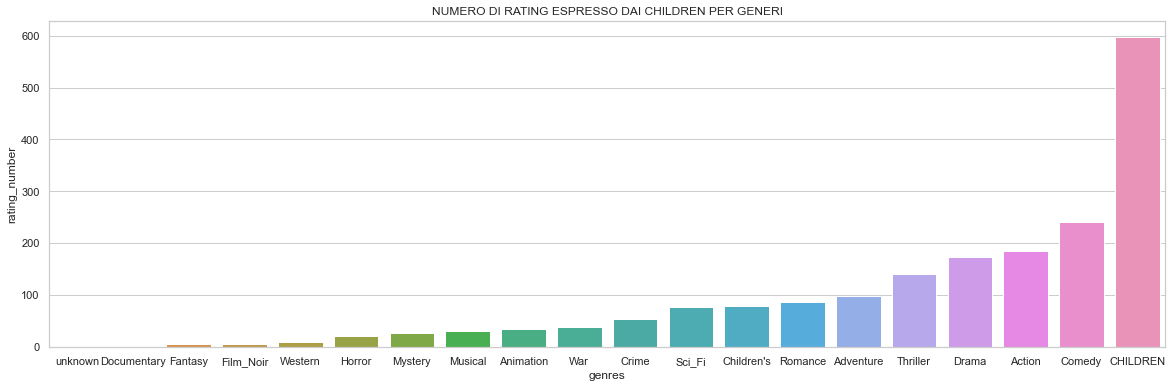

In [80]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number",  data=df_children_genre.sort_values("rating_number"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("NUMERO DI RATING ESPRESSO DAI CHILDREN PER GENERI")



# Notiamo come i film noir, war e mistery pur avendo la media di rating più alti sono poco rappresentativi dei children
# I FILM DRAMA SEMBREREBBERO ESSERE UN BUON RIFERIMENTO INVECE

Text(0.5, 1.0, 'PERCENTUALE DI RATING ESPRESSO DAI CHILDREN PER GENERI')

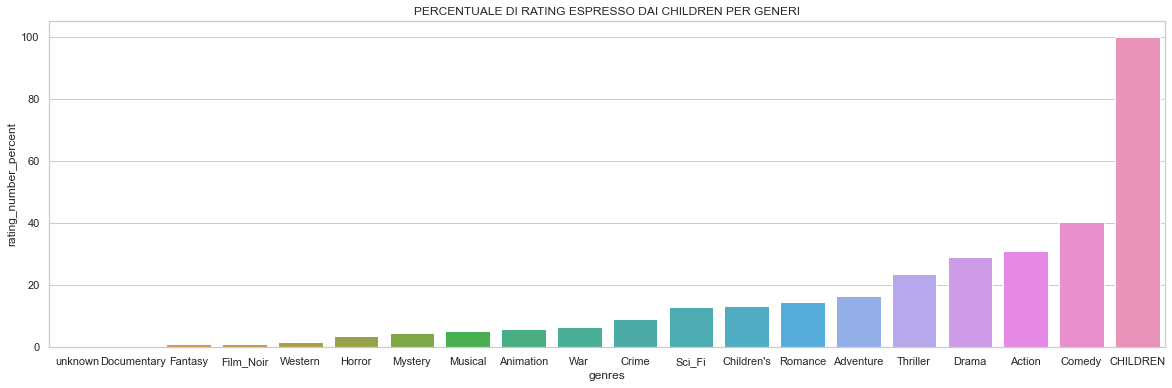

In [154]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number_percent",  data=df_children_genre.sort_values("rating_number_percent"))

fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("PERCENTUALE DI RATING ESPRESSO DAI CHILDREN PER GENERI")

Text(0.5, 1.0, 'MEDIA PESATA RATING CHILDREN PER GENERI')

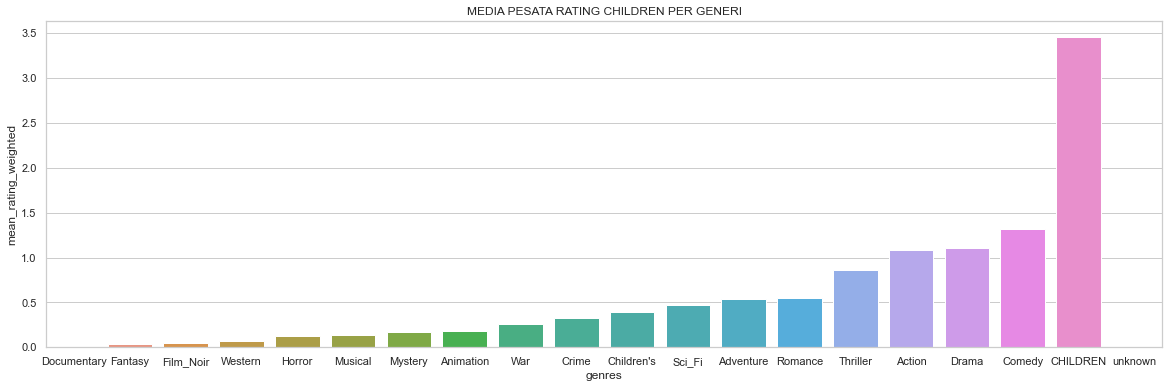

In [146]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="mean_rating_weighted",  data=df_children_genre.sort_values("mean_rating_weighted"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("MEDIA PESATA RATING CHILDREN PER GENERI")

Text(0.5, 1.0, 'RAPPORTO NUMERO DI LIKE PER NUMERO TOT DI REVIEW PER GENERI')

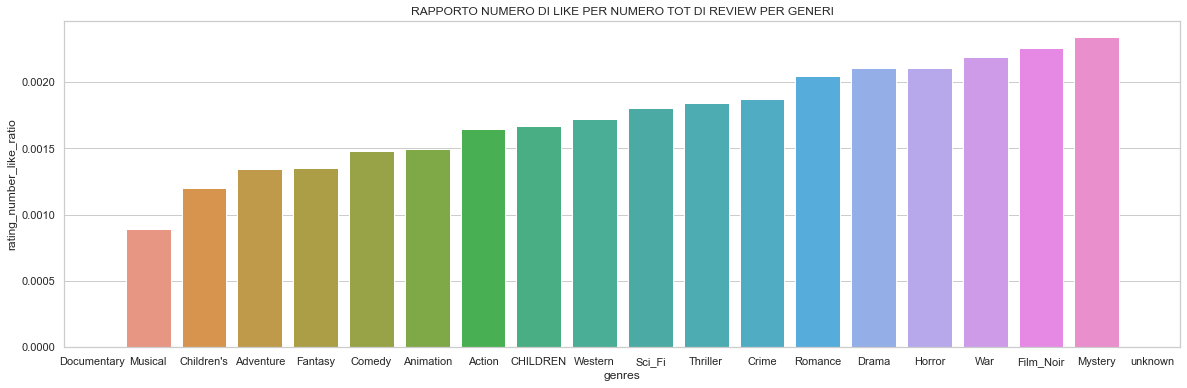

In [143]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number_like_ratio",  data=df_children_genre.sort_values("rating_number_like_ratio"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("RAPPORTO NUMERO DI LIKE PER NUMERO TOT DI REVIEW PER GENERI")

Text(0.5, 1.0, 'SCORE PER GENERE')

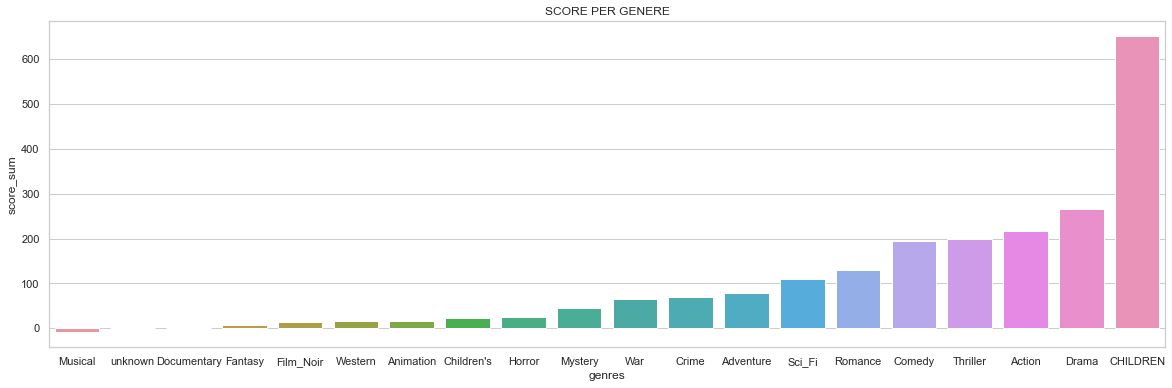

In [144]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="score_sum",  data=df_children_genre.sort_values("score_sum"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("SCORE PER GENERE")

<AxesSubplot:ylabel='genre'>

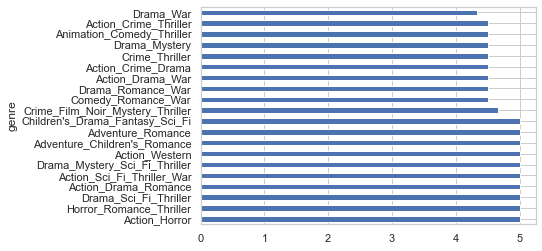

In [129]:
children.groupby("genre").mean().rating.sort_values(ascending=False)[0:20].plot(kind='barh')

<AxesSubplot:ylabel='genre'>

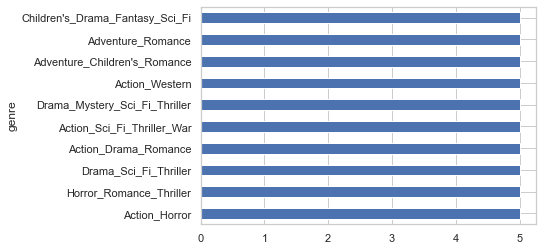

In [130]:
children.groupby("genre").mean().rating.sort_values(ascending=False)[0:10].plot(kind='barh')

In [135]:
top_10_rated = children.groupby("genre").mean().rating.sort_values(ascending=False)[0:10].index

<AxesSubplot:ylabel='genre'>

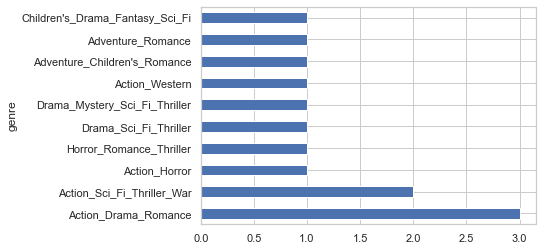

In [137]:
children.groupby("genre").count().loc[top_10_rated].item.sort_values(ascending=False).plot(kind='barh')

In [209]:
children.groupby("genre").count().item.sort_values(ascending=False)[0:12]

genre
Comedy                          90
Drama                           48
Action_Thriller                 26
Comedy_Romance                  22
Children's_Comedy               21
Drama_Romance                   16
Animation_Children's_Musical    16
Comedy_Drama                    15
Drama_Thriller                  15
Action_Adventure_Thriller       14
Action_Adventure_Sci_Fi         12
Action                          10
Name: item, dtype: int64

305
percentuale dei children =  51.00334448160535


<AxesSubplot:ylabel='genre'>

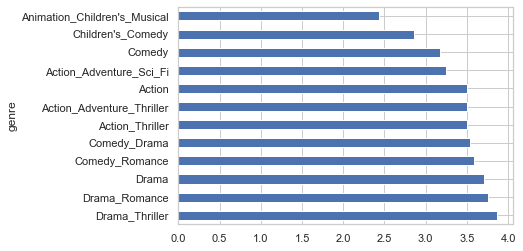

In [193]:
somma_12pop = children.groupby("genre").count().item.sort_values(ascending=False)[0:12].sum()

# scelti perché tutti maggiori o uguali alla decina

print(somma_12pop)


# 598 tot children
print("percentuale dei children = ", somma_12pop/598*100)

indexes = children.groupby("genre").count().item.sort_values(ascending=False)[0:12].index

children.groupby("genre").mean().rating.loc[indexes].sort_values(ascending=False).plot(kind='barh')

In [216]:
children[children['genre'] == 'Drama_Thriller']["movie_title"].unique()

array(['Volcano (1997)', 'Apt Pupil (1998)',
       'Silence of the Lambs, The (1991)', 'Taxi Driver (1976)',
       'Primal Fear (1996)', 'Ransom (1996)', 'Dolores Claiborne (1994)',
       'Extreme Measures (1996)'], dtype=object)

In [207]:
item_df.loc[98]

movie_title                            Silence of the Lambs, The (1991)
release_date                                                01-Jan-1991
video_release_date                                                  NaN
IMDb_URL              http://us.imdb.com/M/title-exact?Silence%20of%...
unknown                                                               0
Action                                                                0
Adventure                                                             0
Animation                                                             0
Children's                                                            0
Comedy                                                                0
Crime                                                                 0
Documentary                                                           0
Drama                                                                 1
Fantasy                                                         

In [147]:
genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]



children_like_genres = {}



# DATAFRAMES:
children_like = merged_df[(merged_df["age_range"] == "children") & (merged_df["sentiment"] == "Dislike")]
children = merged_df[merged_df["age_range"] == 'children']

NUMBER_OF_CHILDREN_LIKE_REVIEW = children_like.item.count()



# ALL CHILDREN

children_like_genres['genres'] = ["CHILDREN"]

# media rating dei children
children_like_genres['mean_rating'] = [children.rating.mean()]

# media pesata per volume del campione
children_like_genres['mean_rating_weighted'] = [children.rating.mean()*children.item.count()/children.item.count()]

#children_like_genres['unique_movie_number'] = [children.item.nunique()]

# numero di like review dei children (tutti i generi)
children_like_genres['rating_number_liked'] = [children_like.item.count()]


# tot numero di rating dei children (all sentiment, all genres)
children_like_genres['rating_number'] = [children.item.count()]

# rating like (all generi) / rating tot (all generi)
children_like_genres['rating_number_like_ratio'] = [children_like.item.count()/NUMBER_OF_CHILDREN_LIKE_REVIEW/children.item.count()]


children_like_genres['score_sum'] = [children.score.sum()]



# FOR GENRE:

for g in genres:
    children_like_genre = children_like[children_like[g] == 1]   
    
    childred_genre = children[children[g] == 1]
    
    
    children_like_genres['genres'].append(g)    
    
    # media rating dei children per il genere
    children_like_genres['mean_rating'].append(childred_genre.rating.mean())
    
    
    # media pesata per volume del campione
    children_like_genres['mean_rating_weighted'].append(childred_genre.rating.mean()*childred_genre.item.count()/children.item.count())
    
    # numero di item univoci per genere
    # children_like_genres['unique_movie_number'].append(childred_genre.item.nunique())
    
    
    # numero di rating like per genere
    children_like_genres['rating_number_liked'].append(children_like_genre.item.count())
    
    # tot numero di rating per genere
    children_like_genres['rating_number'].append(childred_genre.item.count())
    
    # rating like / rating tot per genere
    children_like_genres['rating_number_like_ratio'].append(children_like_genre.item.count()/NUMBER_OF_CHILDREN_LIKE_REVIEW/childred_genre.item.count())

    # sum degli score:
    children_like_genres['score_sum'].append(childred_genre.score.sum())
    
    
df_children_genre = pd.DataFrame(data=children_like_genres)  
df_children_genre.head()

C:\Users\samue\AppData\Local\Temp/ipykernel_2776/3820358741.py:75: RuntimeWarning: invalid value encountered in double_scalars
  children_like_genres['rating_number_like_ratio'].append(children_like_genre.item.count()/NUMBER_OF_CHILDREN_LIKE_REVIEW/childred_genre.item.count())


genres  mean_rating  mean_rating_weighted  rating_number_liked  \
0   CHILDREN     3.463211              3.463211                  112   
1    unknown          NaN                   NaN                    0   
2     Action     3.483871              1.083612                   30   
3  Adventure     3.282828              0.543478                   24   
4  Animation     3.083333              0.185619                   11   

   rating_number  rating_number_like_ratio  score_sum  
0            598                  0.001672        651  
1              0                       NaN          0  
2            186                  0.001440        216  
3             99                  0.002165         79  
4             36                  0.002728         17

Text(0.5, 1.0, 'RAPPORTO NUMERO DI LIKE PER NUMERO TOT DI REVIEW PER GENERI')

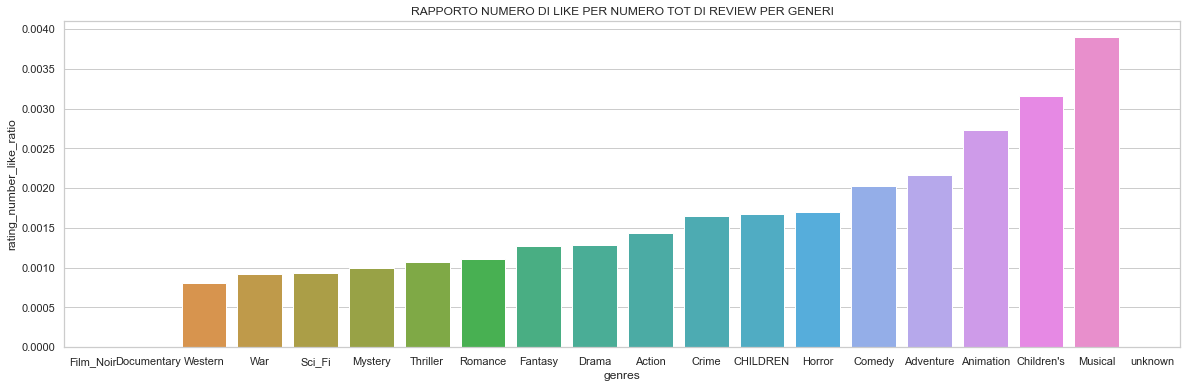

In [148]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number_like_ratio",  data=df_children_genre.sort_values("rating_number_like_ratio"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("RAPPORTO NUMERO DI LIKE PER NUMERO TOT DI REVIEW PER GENERI")

In [160]:
df_children_genre.sort_values("rating_number_percent", ascending=False)[1:8].rating_number_percent

6     40.468227
2     31.103679
9     28.929766
17    23.578595
3     16.555184
15    14.715719
5     13.210702
Name: rating_number_percent, dtype: float64

In [244]:
merged_df.groupby("genre").count().item.sort_values(ascending=False)[0:35].sum()  # > 70%
indexes = merged_df.groupby("genre").count().item.sort_values(ascending=False)[0:35].index  # indici

merged_df.groupby("genre").rating.mean().loc[indexes].sort_values(ascending=False)[0:10]

genre
Action_Adventure_Romance_Sci_Fi_War    4.195413
Action_Crime_Drama                     4.149059
Drama_War                              3.947316
Action_Drama_War                       3.921799
Crime_Thriller                         3.885817
Drama_Romance_War                      3.880928
Crime_Drama                            3.821402
Crime_Drama_Thriller                   3.794020
Drama_Sci_Fi                           3.792360
Western                                3.722892
Name: rating, dtype: float64

In [245]:
# meno liked

merged_df.groupby("genre").rating.mean().loc[indexes].sort_values(ascending=True)[0:10]

genre
Children's_Comedy                   2.773830
Action                              2.844141
Action_Adventure_Sci_Fi_Thriller    2.996845
Horror                              3.148909
Horror_Thriller                     3.217213
Comedy                              3.265059
Thriller                            3.310786
Action_Adventure_Thriller           3.327869
Action_Romance_Thriller             3.333668
Action_Thriller                     3.421690
Name: rating, dtype: float64

In [262]:
children.count()[0]

598

In [273]:
i = 1
somma = 0
while somma < children.count()[0]/100*70:
    somma = children.groupby("genre").count().item.sort_values(ascending=False)[0:i].sum()
    i += 1

print(i)
print(somma)
print(somma/children.count()[0]*100)
    
children.groupby("genre").count().item.sort_values(ascending=False)[0:i].sum()  # > 70%
indexes = children.groupby("genre").count().item.sort_values(ascending=False)[0:i].index  # indici

indx = children.groupby("genre").rating.mean().loc[indexes].sort_values(ascending=False)[0:10].index


children[children["genre"].isin(indx)].movie_title.unique()

33
420
70.23411371237458


array(['Return of the Jedi (1983)', 'Contact (1997)',
       'Twelve Monkeys (1995)', 'Tomorrow Never Dies (1997)',
       'Volcano (1997)', 'Apt Pupil (1998)', 'Star Wars (1977)',
       'Apollo 13 (1995)', 'Kiss the Girls (1997)',
       'Seven Years in Tibet (1997)', 'G.I. Jane (1997)',
       'Fire Down Below (1997)', 'Jackie Brown (1997)',
       'Silence of the Lambs, The (1991)', 'Fargo (1996)',
       'Copycat (1995)', 'Outbreak (1995)', 'Taxi Driver (1976)',
       'Courage Under Fire (1996)', 'Saint, The (1997)',
       'Mystery Science Theater 3000: The Movie (1996)',
       "Schindler's List (1993)", 'Speed (1994)', 'Primal Fear (1996)',
       'Crow, The (1994)', 'Pulp Fiction (1994)',
       'Back to the Future (1985)', 'Desperado (1995)',
       'Coneheads (1993)', 'Full Metal Jacket (1987)',
       'GoodFellas (1990)', 'Ransom (1996)', 'Braveheart (1995)',
       'Donnie Brasco (1997)', 'Dolores Claiborne (1994)',
       'Extreme Measures (1996)', 'Apocalypse Now (1979)

In [334]:
# pd.isna(float(date))

mean = int(merged_df[merged_df["release_date"].notna()].release_date.apply(lambda x: datetime.strptime(str(x), '%d-%b-%Y').year).mean())

def from_release_date_to_year(date):
        try:
            return datetime.strptime(str(date), '%d-%b-%Y').year
        except:
            return mean

In [335]:
merged_df["year"] = merged_df.timestamp.apply(lambda x: datetime.fromtimestamp(x).year)

#release_date: 24-Jan-1997



merged_df["release_year"] = merged_df.release_date.apply(lambda x: from_release_date_to_year(x))


merged_df[["year","release_year"]].describe()

year   release_year
count  100000.00000  100000.000000
mean     1997.47116    1987.956130
std         0.49917      14.154889
min      1997.00000    1922.000000
25%      1997.00000    1986.000000
50%      1997.00000    1994.000000
75%      1998.00000    1996.000000
max      1998.00000    1998.000000

In [336]:
merged_df.columns

Index(['user', 'item', 'rating', 'timestamp', 'movie_id', 'movie_title',
       'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western', 'user_id',
       'age', 'gender', 'occupation', 'zip_code', 'age_range', 'sentiment',
       'genre', 'review_number', 'user_review_number', 'score', 'date', 'year',
       'release_year'],
      dtype='object')

Text(0.5, 1.0, 'CORRELAZIONE FRA COLONNE NUMERICHE')

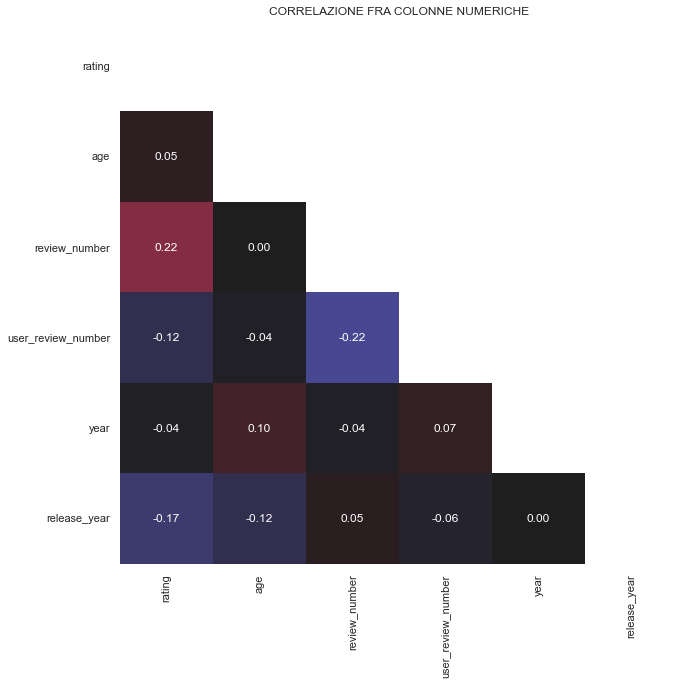

In [344]:
col = ['rating', 'age', 'gender', 'review_number', 'user_review_number', 'year',
       'release_year']


sns.heatmap(merged_df[col].corr(),
            vmin=-0.3,
            vmax=0.6,
            center=0,
            annot=True,
            fmt='.2f',
            mask=~np.tri(merged_df[col].corr().shape[1], k=-1, dtype=bool),
            cbar=False)
 
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.title("CORRELAZIONE FRA COLONNE NUMERICHE")

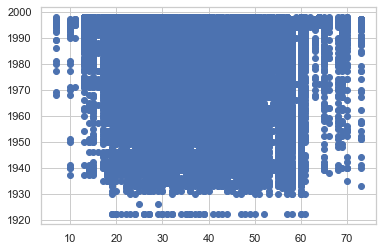

In [349]:
plt.scatter(merged_df.age, merged_df.release_year)

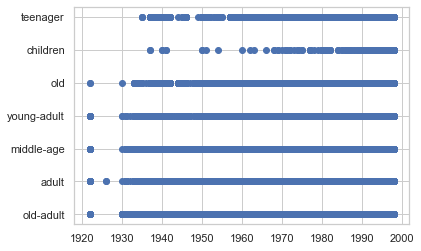

In [370]:
plt.scatter(merged_df.release_year, merged_df.age_range)

# Il dato più evidente è che le categorie children e teenager hanno fornito poche valutazioni dei film dal 1920 al 1960-70
# praticamente nessuna dal 1920 al 1940

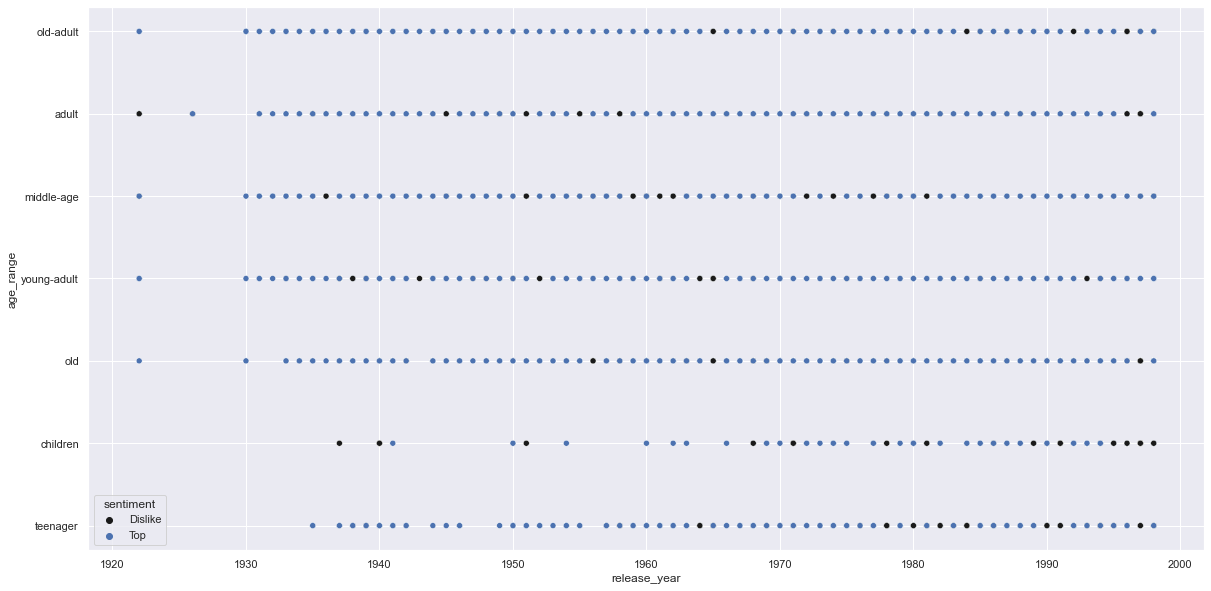

In [395]:
markers = {"Top": "s", "Dislike": "X", "Neutral": "o"}

selected = merged_df[(merged_df["sentiment"] == 'Top') | (merged_df["sentiment"] == 'Dislike')]

sns.scatterplot(data=selected, x="release_year", y="age_range", hue = 'sentiment',palette=["k", "C0"])
sns.set_style("darkgrid")


fig = plt.gcf()
fig.set_size_inches(20, 10)

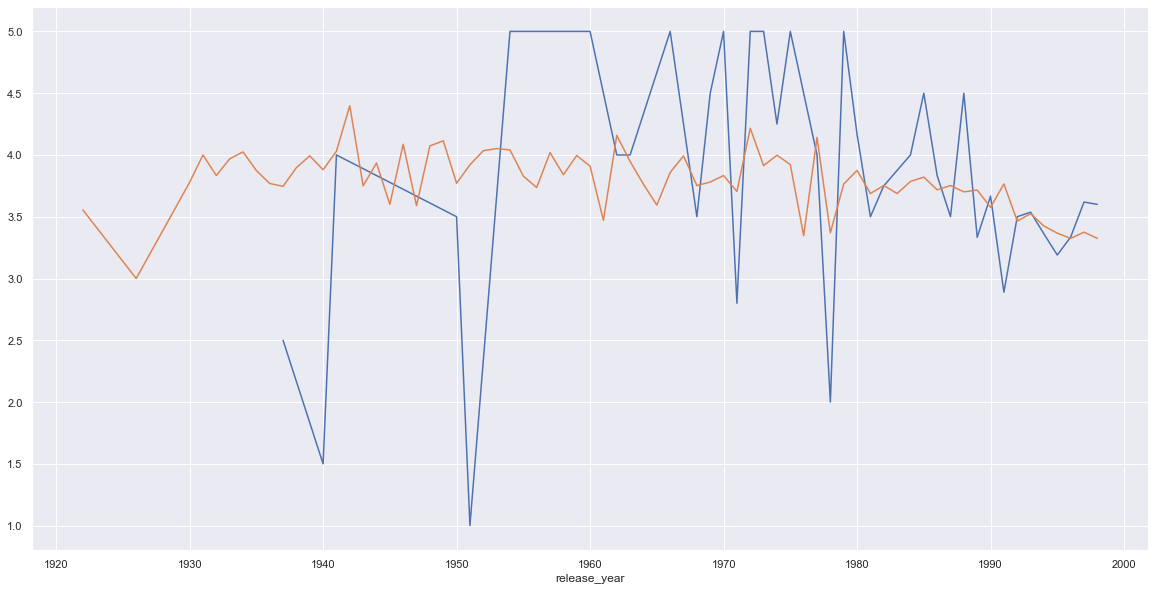

In [427]:
merged_df[merged_df["age_range"] == 'children'].groupby("release_year").mean().rating.plot()
merged_df.groupby("release_year").mean().rating.plot()
#merged_df[merged_df["age_range"] == 'teenager'].groupby("release_year").mean().rating.plot()

fig = plt.gcf()
fig.set_size_inches(20, 10)


# La curva dei children è abbastanza differente rispetto a quella generale

<AxesSubplot:xlabel='age'>

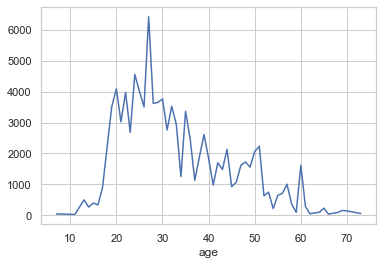

In [357]:
merged_df.groupby("age").user.count().plot()

In [367]:
merged_df.columns

Index(['user', 'item', 'rating', 'timestamp', 'movie_id', 'movie_title',
       'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western', 'user_id',
       'age', 'gender', 'occupation', 'zip_code', 'age_range', 'sentiment',
       'genre', 'review_number', 'user_review_number', 'score', 'date', 'year',
       'release_year'],
      dtype='object')

In [436]:
merged_df.occupation.unique()

array(['writer', 'marketing', 'student', 'other', 'administrator',
       'engineer', 'educator', 'homemaker', 'librarian', 'executive',
       'technician', 'retired', 'scientist', 'entertainment',
       'healthcare', 'programmer', 'artist', 'lawyer', 'none', 'salesman',
       'doctor'], dtype=object)

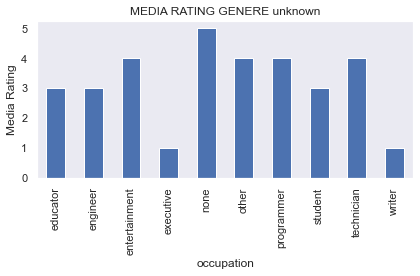

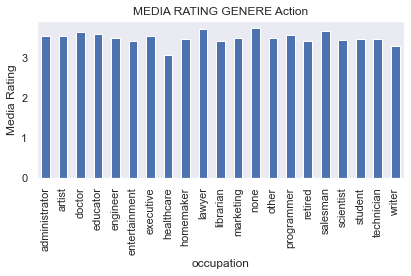

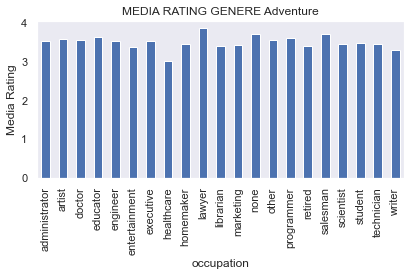

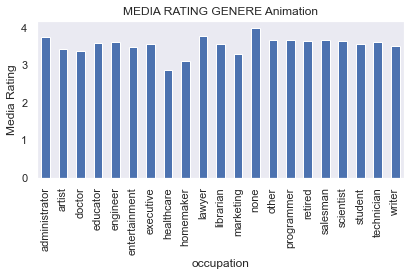

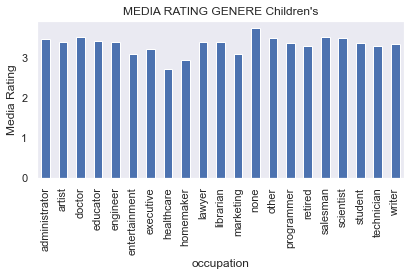

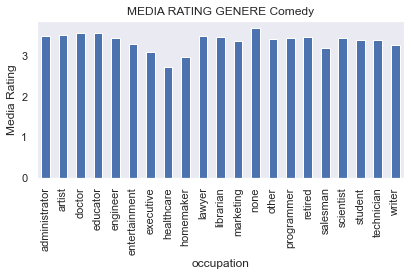

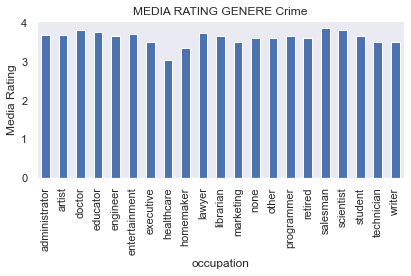

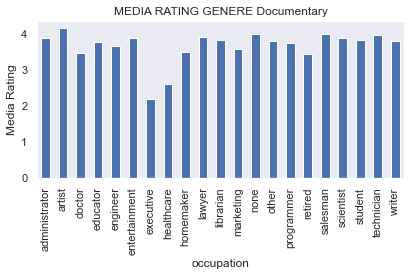

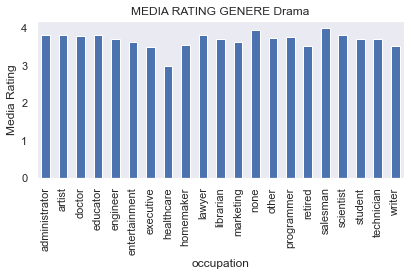

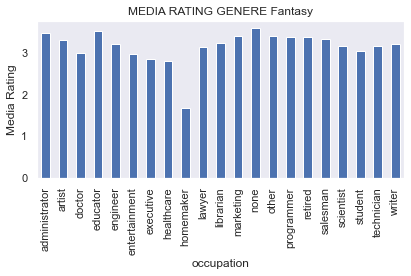

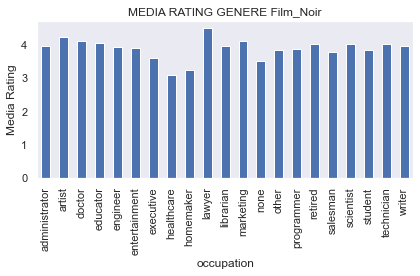

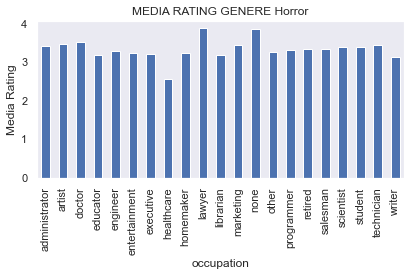

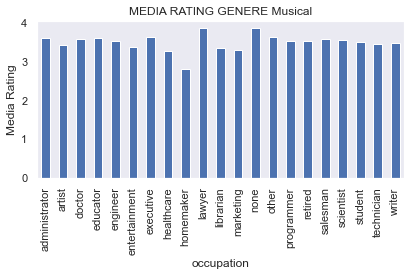

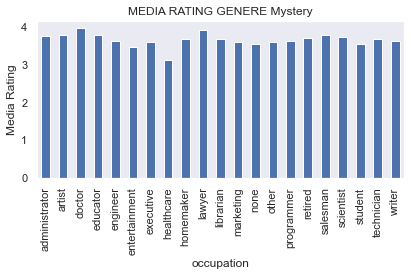

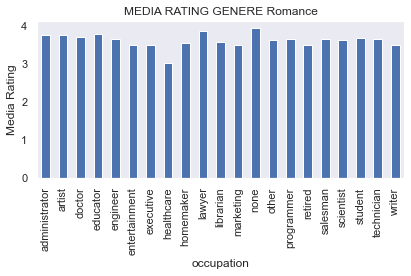

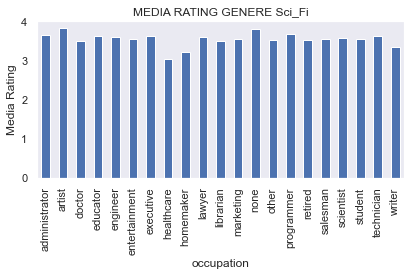

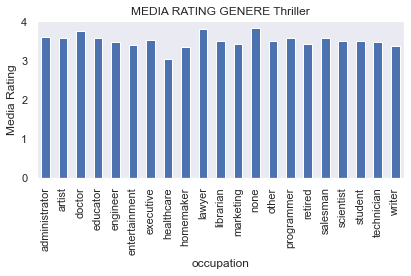

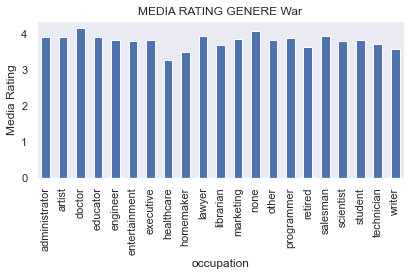

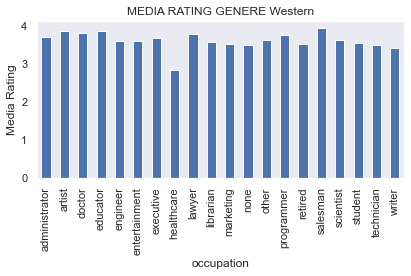

In [439]:
genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]

for g in genres:
    plt.figure()
    selected = merged_df[merged_df[g] == 1]
    selected.groupby("occupation").mean().rating.plot(kind='bar')
    plt.title(f'MEDIA RATING GENERE {g}')
    plt.ylabel('Media Rating')
    plt.grid()
    plt.tight_layout()
    
    # Show/save figure as desired.
plt.show()
# Can show all four figures at once by calling plt.show() here, outside the loop.
#plt.show()
    

In [441]:
merged_df.rating.mean()

3.52986

In [446]:
genres = ["Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]

occupations = merged_df.occupation.unique()

m = merged_df.rating.mean()

for g in genres:
    selected = merged_df[merged_df[g] == 1]
    media_genere =  selected.rating.mean()
    for o in occupations:
        media_occup_genere = selected[selected["occupation"] == o].rating.mean()
        if media_occup_genere < media_genere -1 or media_occup_genere > media_genere + 1:
            print(f"media genere {g} = {media_genere}")
            print(f"media genere {g} lavoro {o} = {media_occup_genere}")
            print("**"*30)
    
    


media genere Documentary = 3.6728232189973613
media genere Documentary lavoro executive = 2.1923076923076925
************************************************************
media genere Documentary = 3.6728232189973613
media genere Documentary lavoro healthcare = 2.6
************************************************************
media genere Fantasy = 3.2152366863905324
media genere Fantasy lavoro homemaker = 1.6666666666666667
************************************************************


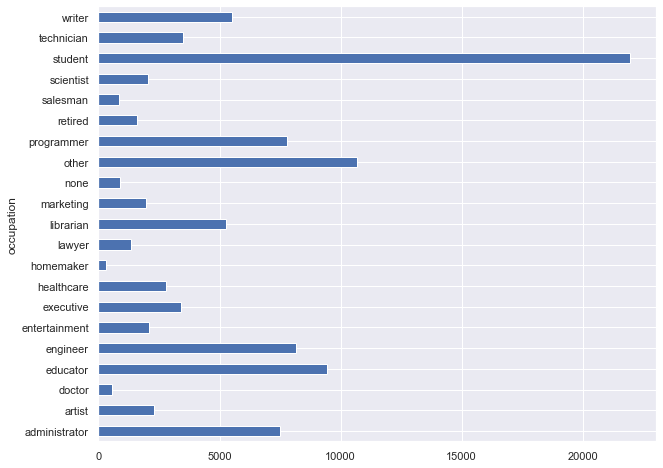

In [460]:
merged_df.groupby("occupation").count().user.plot.barh()




fig = plt.gcf()
fig.set_size_inches(10, 8)


# Gli studenti sono nettamente l'occupazione più rappresentata

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\samue\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\samue\AppData\Local\Temp/ipykernel_2776/510108627.py", line 11, in <module>
    g.map_lower(sns.kdeplot)
  File "C:\Users\samue\anaconda3\lib\site-packages\seaborn\axisgrid.py", line 1357, in map_lower
    self._map_bivariate(func, indices, **kwargs)
  File "C:\Users\samue\anaconda3\lib\site-packages\seaborn\axisgrid.py", line 1539, in _map_bivariate
    self._plot_bivariate(x_var, y_var, ax, func, **kws)
  File "C:\Users\samue\anaconda3\lib\site-packages\seaborn\axisgrid.py", line 1579, in _plot_bivariate
    func(x=x, y=y, **kwargs)
  File "C:\Users\samue\anaconda3\lib\site-packages\seaborn\_decorators.py", line 46, in inner_f
    return f(**kwargs)
  File "C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py", line 1783, in kdeplot
    p.plot_bivariate_dens

TypeError: object of type 'NoneType' has no len()

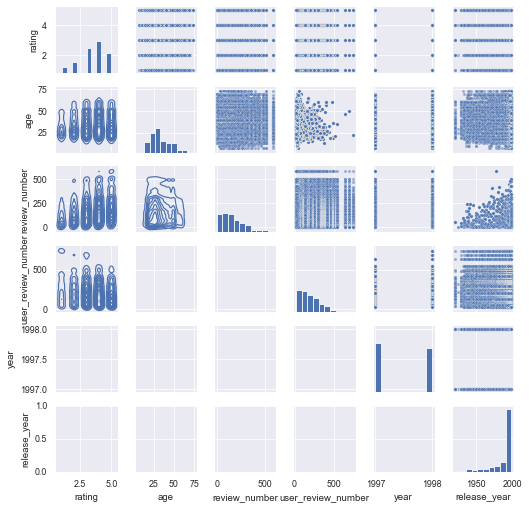

In [480]:
sns.set_context("paper")

num_col = ['rating', 'age', 'gender', 'review_number', 'user_review_number', 'year',
       'release_year']


g = sns.PairGrid(merged_df[num_col], height=1.2, aspect =1.0)

g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=10, alpha=0.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)

In [481]:
df.head()

user  item  rating  timestamp
0   196   242       3  881250949
1   186   302       3  891717742
2    22   377       1  878887116
3   244    51       2  880606923
4   166   346       1  886397596

In [494]:
! pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=6c21ae3dacf38301c529f2a896a082ff152eb2d2f9272656ada1a2e9d80e6835
  Stored in directory: c:\users\samue\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


# CREATE RATING MATRIX

In [1159]:
matrix = merged_df.pivot_table(index="user", columns="item", values="rating")

## Compute Pairwise (Pearson) Correlation

In [630]:
yf = matrix["Young Frankenstein (1974)"]

similar_yf = matrix.corrwith(yf)
similar_yf


df_yf = pd.DataFrame(similar_yf, columns=["Correlation"])
df_yf.dropna(inplace=True)
df_yf.sort_values("Correlation", ascending=False).head(10)

Correlation
movie_title                                        
Boys Life (1995)                                1.0
Selena (1997)                                   1.0
Young Frankenstein (1974)                       1.0
Maya Lin: A Strong Clear Vision (1994)          1.0
Gang Related (1997)                             1.0
Chasers (1994)                                  1.0
Sixth Man, The (1997)                           1.0
Nothing to Lose (1994)                          1.0
Mrs. Dalloway (1997)                            1.0
Mr. Jones (1993)                                1.0

In [696]:

lista_indici = list(df_yf.sort_values("Correlation", ascending=False).head(41).Correlation.index)
lista_indici.remove('Young Frankenstein (1974)')
lista_indici

['Boys Life (1995)',
 'Selena (1997)',
 'Maya Lin: A Strong Clear Vision (1994)',
 'Gang Related (1997)',
 'Chasers (1994)',
 'Sixth Man, The (1997)',
 'Nothing to Lose (1994)',
 'Mrs. Dalloway (1997)',
 'Mr. Jones (1993)',
 'Metisse (Café au Lait) (1993)',
 'Dangerous Beauty (1998)',
 'Paradise Road (1997)',
 'Madame Butterfly (1995)',
 "Some Mother's Son (1996)",
 'Last Summer in the Hamptons (1995)',
 'Phat Beach (1996)',
 'Talking About Sex (1994)',
 'Hearts and Minds (1996)',
 'That Old Feeling (1997)',
 'Guantanamera (1994)',
 'Golden Earrings (1947)',
 'Wedding Gift, The (1994)',
 'Safe Passage (1994)',
 'Flower of My Secret, The (Flor de mi secreto, La) (1995)',
 'World of Apu, The (Apur Sansar) (1959)',
 'Flesh and Bone (1993)',
 'Dark City (1998)',
 'Nowhere (1997)',
 'Dangerous Ground (1997)',
 'City of Angels (1998)',
 'Perfect Candidate, A (1996)',
 'Carpool (1996)',
 'Curdled (1996)',
 'Lamerica (1994)',
 'Set It Off (1996)',
 'Lost in Space (1998)',
 'Bliss (1997)',
 'un

<AxesSubplot:ylabel='genre'>

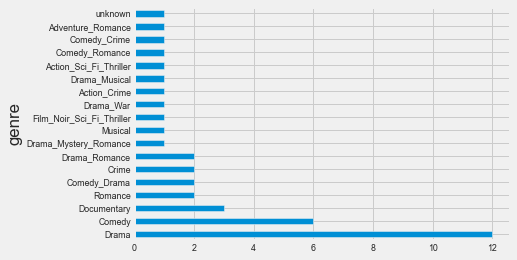

In [697]:
merged_df[merged_df["movie_title"]\
          .isin(lista_indici)][["movie_title", "genre"]]\
            .drop_duplicates('movie_title')\
            .groupby("genre").count().sort_values(by="movie_title", ascending=False).plot.barh(legend=None)



<AxesSubplot:ylabel='genre'>

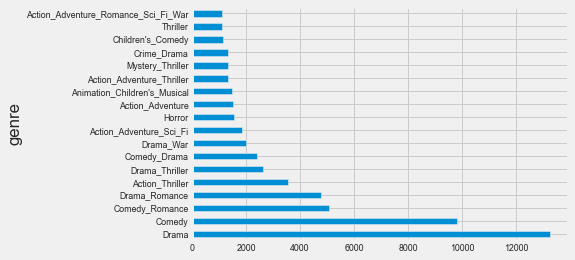

In [698]:
merged_df[["movie_title", "genre"]]\
            .groupby("genre").count().sort_values(by="movie_title", ascending=False)[0:18].plot.barh(legend=None)


In [761]:
from surprise import Reader, Dataset
from surprise import BaselineOnly, KNNBaseline, KNNBasic, KNNWithMeans, SVD, NMF
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
from surprise import accuracy

from collections import defaultdict

# SET calcolo della similarità = cosine similarity
sim_options = {'name': 'cosine'}

reader = Reader(rating_scale=(1, 5))


data = Dataset.load_from_df(df[df.columns[:-1]], reader)

train, test = train_test_split(data, test_size=0.2, random_state=42)

sim_options = {'name': 'cosine'}

algo = KNNBasic(sim_options=sim_options)
# K: The (max) number of neighbors to take into account for aggregation. Default is 40.
# min_k: The minimum number of neighbors to take into account for aggregation. If there
    # are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1
# sim_options: A dictionary of options for the similarity measure. The parameter
    # 'user_based’: Define if similarities will be computed between users or between items.
    # Default is True.
# Verbose: Whether to print trace messages of bias estimation, similarity, etc. Default is True.

algo.fit(train)

predictions = algo.test(test)

acc = accuracy.rmse(predictions)

print("RMSE = ", acc)

print("MSE = ", accuracy.mse(predictions))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0263
1.0262691023657384


In [763]:
accuracy.mse(predictions)

MSE: 1.0532


1.0532282704705784

In [702]:
matrix[0:1]

movie_title  'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user                                                                          
1                                  NaN           NaN                    2.0   

movie_title  12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user                                                                        
1                            5.0         NaN                          NaN   

movie_title  20,000 Leagues Under the Sea (1954)  \
user                                               
1                                            3.0   

movie_title  2001: A Space Odyssey (1968)  \
user                                        
1                                     4.0   

movie_title  3 Ninjas: High Noon At Mega Mountain (1998)  \
user                                                       
1                                                    NaN   

movie_title  39 Steps, The (1935)  ...  Yankee Zulu (1994)  \
user                               ...                       
1                             NaN  ...                 NaN   

movie_title  Year of the Horse (1997)  You So Crazy (1994)  \
user                                                         
1                                 NaN                  NaN   

movie_title  Young Frankenstein (1974)  Young Guns (1988)  \
user                                                        
1                                  5.0                3.0   

movie_title  Young Guns II (1990)  Young Poisoner's Handbook, The (1995)  \
user                                                                       
1                             NaN                                    NaN   

movie_title  Zeus and Roxanne (1997)  unknown  \
user                                            
1                                NaN      4.0   

movie_title  Á köldum klaka (Cold Fever) (1994)  
user                                             
1                                           NaN  

[1 rows x 1664 columns]

In [704]:
def from_title_to_id(title):
    return merged_df[merged_df["movie_title"] == title].item.iloc[0]

In [747]:
from_title_to_id("'Til There Was You (1997)")




1300

In [741]:
null_matrix = matrix[matrix.isnull()]
matrix.isnull()

movie_title  'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user                                                                          
1                                 True          True                  False   
2                                 True          True                   True   
3                                 True          True                   True   
4                                 True          True                   True   
5                                 True          True                  False   
...                                ...           ...                    ...   
939                               True          True                   True   
940                               True          True                   True   
941                               True          True                   True   
942                               True          True                   True   
943                               True          True                   True   

movie_title  12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user                                                                        
1                          False        True                         True   
2                           True        True                         True   
3                           True       False                         True   
4                           True        True                         True   
5                           True        True                         True   
...                          ...         ...                          ...   
939                         True        True                         True   
940                         True        True                         True   
941                         True        True                         True   
942                         True        True                         True   
943                         True        True                        False   

movie_title  20,000 Leagues Under the Sea (1954)  \
user                                               
1                                          False   
2                                           True   
3                                           True   
4                                           True   
5                                           True   
...                                          ...   
939                                         True   
940                                         True   
941                                         True   
942                                         True   
943                                         True   

movie_title  2001: A Space Odyssey (1968)  \
user                                        
1                                   False   
2                                    True   
3                                    True   
4                                    True   
5                                   False   
...                                   ...   
939                                  True   
940                                  True   
941                                  True   
942                                 False   
943                                  True   

movie_title  3 Ninjas: High Noon At Mega Mountain (1998)  \
user                                                       
1                                                   True   
2                                                  False   
3                                                   True   
4                                                   True   
5                                                   True   
...                                                  ...   
939                                                 True   
940                                                 True   
941                                                 True   
942                                            

In [753]:
matrix["12 Angry Men (1957)"][1] = 5.0
matrix["12 Angry Men (1957)"][1]

5.0

In [755]:


def from_title_to_id(title):
    return merged_df[merged_df["movie_title"] == title].item.iloc[0]

def fill_cell(model, user_id, movie):
    movie_id = from_title_to_id(movie)
    return algo.predict(uid=user_id, iid=movie_id).est

def fill_matrix(matrix, model):
    
    matrix_filled = matrix
    
    for utente in matrix_filled.index:
        for movie in matrix_filled.columns:
            if pd.isnull(matrix_filled[movie][utente]):
                matrix_filled[movie][utente] = fill_cell(model, utente, movie)
    return matrix_filled

In [ ]:
import random
import difflib

def generate_recommendation(user_id, model, merged_df, thresh=4):
    
    movie_titles = list(merged_df['movie_title'].values)
    random.shuffle(movie_titles)
    
    for movie in movie_titles:
        
        rating = predict_review(user_id, movie, model, merged_df)
        
        if rating >= thresh:
            
            movie_id = get_movie_id(movie, merged_df)
            
            return get_movie_info(movie_id, metadata)



def get_movie_id(movie_title, merged_df):
    existing_titles = list(merged_df['movie_title'].values)
    closest_titles = difflib.get_close_matches(movie_title, existing_titles)
    movie_id = merged_df[merged_df['movie_title'] == closest_titles[0]]['item'].values[0]
    return movie_id


def predict_review(user_id, movie_title, model, merged_df):
    movie_id = get_movie_id(movie_title, merged_df)
    review_prediction = model.predict(uid=user_id, iid=movie_id)
    return review_prediction.est



def get_movie_info(movie_id, merged_df):
    movie_info = merged_df[merged_df['id'] == movie_id][['item', 'movie_title', 'year', 'title', 'original_title']]
    return movie_info.to_dict(orient='records')




# KNN BASIC - COSINE SIMILARITY

In [756]:
acc_dict = {}


for i in range(60):
    algo = KNNBasic(k=i, sim_options=sim_options)
# K: The (max) number of neighbors to take into account for aggregation. Default is 40.
# min_k: The minimum number of neighbors to take into account for aggregation. If there
    # are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1
# sim_options: A dictionary of , options for the similarity measure. The parameter
    # 'user_based’: Define if similarities will be computed between users or between items.
    # Default is True.
# Verbose: Whether to print trace messages of bias estimation, similarity, etc. Default is True.

    algo.fit(train)

    predictions = algo.test(test)

    acc = accuracy.rmse(predictions)
    
    acc_dict[i] = acc



Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1303
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.3987
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.2144
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1453
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1100
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0877
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0746
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0664
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0597
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0533
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0488
Computing the cosine 

In [757]:
dict(sorted(acc_dict.items(), key=lambda item: item[1]))

{55: 1.018478120139217,
 58: 1.018478141541007,
 59: 1.0184939250495477,
 57: 1.0185177721039127,
 53: 1.0185594623942045,
 56: 1.0185689819879997,
 54: 1.0185729184083971,
 51: 1.0185892750489214,
 52: 1.0187204154684142,
 50: 1.018721342662647,
 49: 1.0188188237275257,
 48: 1.0188532443514717,
 47: 1.0188630126248852,
 46: 1.0189105781289467,
 44: 1.01893065056566,
 45: 1.019076604039809,
 41: 1.019091164536941,
 42: 1.0191035225448313,
 43: 1.0191470421245634,
 40: 1.0193536815834319,
 39: 1.0195972606015868,
 38: 1.0197899640223909,
 36: 1.020041611504543,
 37: 1.0200898551705968,
 35: 1.0204546053115529,
 34: 1.020501752439237,
 33: 1.02067013031416,
 32: 1.0209570315657623,
 31: 1.0211154752428364,
 30: 1.021571743755653,
 29: 1.0221842810819135,
 28: 1.0227675224642634,
 27: 1.0235334723193918,
 26: 1.0241673222193657,
 25: 1.0245374041450885,
 24: 1.0246547843371374,
 23: 1.0253308593615456,
 22: 1.0262691023657384,
 21: 1.0271164311245942,
 20: 1.0283818603895467,
 19: 1.02917

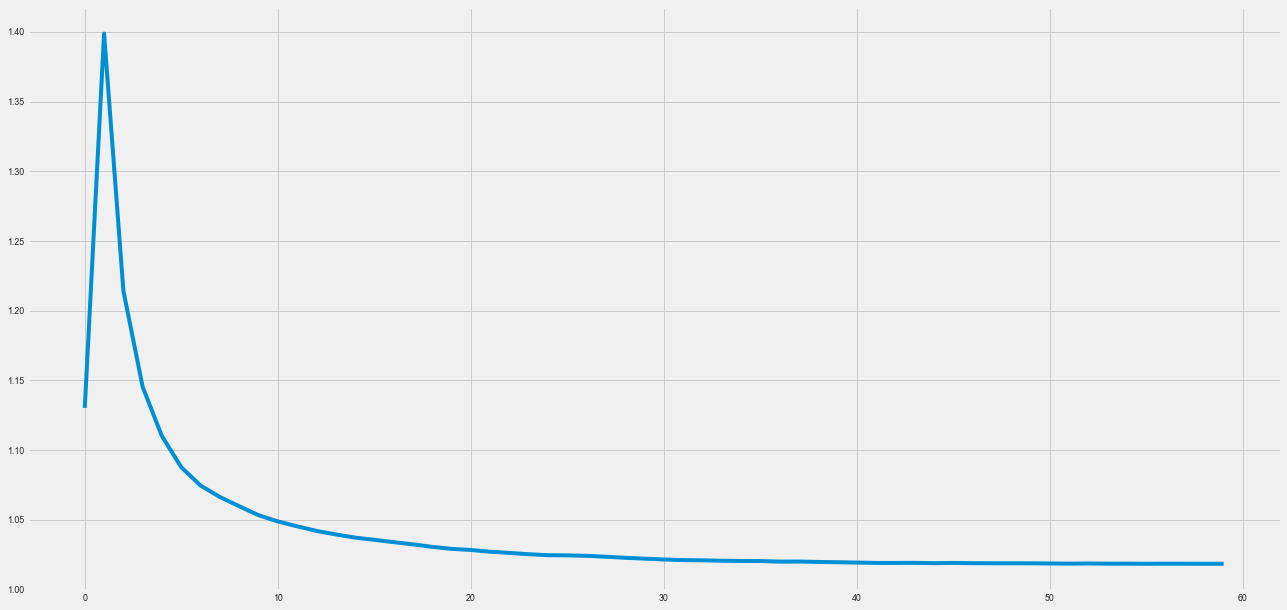

In [758]:
lists = sorted(acc_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)

fig = plt.gcf()
fig.set_size_inches(20, 10)


plt.show()



# BaselineOnly -  Alternating Least Square - Cosine Similarity

In [765]:
bsl_options = {
    "method": "als"
}
algo = BaselineOnly(bsl_options=bsl_options)

algo.fit(train)
predictions = algo.test(test) 

print("RMSE = ", accuracy.rmse(predictions))

print("MSE = ", accuracy.mse(predictions))

Estimating biases using als...
RMSE: 0.9442
RMSE =  0.9441798799352237
MSE: 0.8915
MSE =  0.8914756456744933


In [764]:
cross_validate(algo=algo, data=data, verbose=True, cv=5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0193  1.0246  1.0221  1.0263  1.0256  1.0236  0.0026  
MAE (testset)     0.8035  0.8116  0.8063  0.8097  0.8109  0.8084  0.0030  
Fit time          3.47    3.49    3.51    3.56    3.58    3.52    0.04    
Test time         5.78    5.93    5.68    5.97    5.56    5.79    0.15    


{'test_rmse': array([1.01930792, 1.02459781, 1.02205345, 1.02628854, 1.02559308]),
 'test_mae': array([0.80350869, 0.81159496, 0.80634139, 0.80965318, 0.81086837]),
 'fit_time': (3.4665169715881348,
  3.4880588054656982,
  3.513805627822876,
  3.5556323528289795,
  3.575716257095337),
 'test_time': (5.7765913009643555,
  5.93339204788208,
  5.67635178565979,
  5.973856687545776,
  5.564819574356079)}

# KNNBasic - Alternating Least Square - Cosine Similarity

In [766]:
algo = KNNBasic(sim_options=sim_options, bsl_options=bsl_options)
# K: The (max) number of neighbors to take into account for aggregation. Default is 40.
# min_k: The minimum number of neighbors to take into account for aggregation. If there
    # are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1
# sim_options: A dictionary of options for the similarity measure. The parameter
    # 'user_based’: Define if similarities will be computed between users or between items.
    # Default is True.
# Verbose: Whether to print trace messages of bias estimation, similarity, etc. Default is True.

algo.fit(train)

predictions = algo.test(test)

print("RMSE = ", accuracy.rmse(predictions))

print("MSE = ", accuracy.mse(predictions))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0194
RMSE =  1.0193536815834319
MSE: 1.0391
MSE =  1.0390819281576966


# Singular Value Decomposition - Grid Search

In [767]:
param_grid = {
    'n_epochs': [10, 20], 
    'lr_all': [0.002, 0.005],
    'reg_all': [0.4, 0.6]
}

gs = GridSearchCV(SVD, param_grid=param_grid, cv=5)

gs.fit(data)

print(gs.best_score)
print(gs.best_params)

In [771]:
print(gs.best_score)
print(gs.best_params)

{'rmse': 0.9567373450191002, 'mae': 0.7664215900789981}
{'rmse': {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}, 'mae': {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}}


# Stochastic Gradient Descent

In [530]:
bsl_options = {
    "method": "sgd"
}
algo = BaselineOnly(bsl_options=bsl_options)

algo.fit(train)
predictions = algo.test(test)

print("RMSE = ", accuracy.rmse(predictions))

print("MSE = ", accuracy.mse(predictions))

Estimating biases using sgd...
RMSE: 0.9403


0.9403410343323161

# KNNBaseline - Grid Search

In [534]:
param_grid = {
    'n_epochs': [10, 20], 
    'lr_all': [0.002, 0.005],
    'reg_all': [0.4, 0.6]
}

gs = GridSearchCV(KNNBaseline, param_grid=param_grid, cv=5)

gs.fit(data)

print(gs.best_score)
print(gs.best_params)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

0.9298819071017539

# KNNBasic - Grid Search

In [773]:
param_grid = {
    'n_epochs': [10, 20], 
    'lr_all': [0.002, 0.005],
    'reg_all': [0.4, 0.6]
}

gs = GridSearchCV(KNNBasic, param_grid=param_grid, cv=5)

gs.fit(data)


print(gs.best_score)
print(gs.best_params)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

# ADDESTRAMENTO SU TUTTO IL DATASET

In [775]:
algo = KNNBasic(sim_options=sim_options)

trainset = data.build_full_trainset()
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


# FILLING MATRICE DI RATING CON KNNBASIC E COSINE SIMILARITY

In [801]:
def from_title_to_id(title):
    return merged_df[merged_df["movie_title"] == title].item.iloc[0]

def fill_cell(model, user_id, movie):
    movie_id = from_title_to_id(movie)
    return algo.predict(uid=user_id, iid=movie_id).est

def fill_matrix(matrix, model):
    
    matrix_filled = matrix
    
    for utente in matrix_filled.index:
        print(utente)
        for movie in matrix_filled.columns:
            if pd.isnull(matrix_filled[movie][utente]):
                matrix_filled[movie][utente] = algo.predict(uid=utente, iid=movie).est
    return matrix_filled

In [802]:
matrix_filled = fill_matrix(matrix, algo)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
matrix_filled.isna().sum().sum()

matrix_filled.columns

In [540]:
! pip install plotly

In [541]:
from pandas import plotting
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
# for path
import os

def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
    <script src="/static/components/requirejs/require.js"></script>
    <script>
    requirejs.config({
    paths: {
    base: '/static/base',
    plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
    },
    });
    </script>
    '''))
import plotly.graph_objects as go

In [879]:
from sklearn.cluster import KMeans


#x = matrix

# wcss: Within Cluster Sum of Squares 

wcss = []

for k in range(1, 20):
    print(k)
    km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    km.fit(matrix_filled)
    wcss.append(km.inertia_)
    

    



1


C:\Users\samue\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


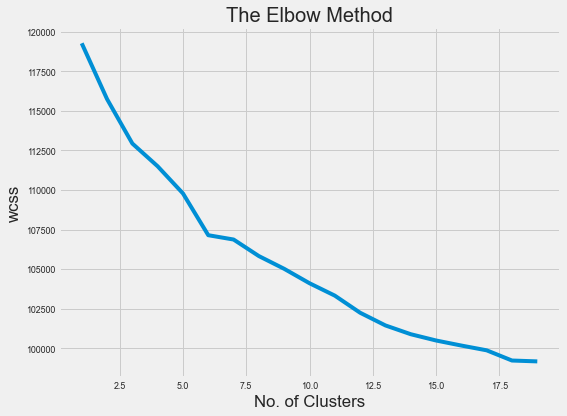

In [883]:
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

# Non 

In [901]:
from sklearn.cluster import KMeans


# x = merged_df[["item", "rating"]]

# SILHOUETTE SCORE
# The higher the intercluster distance, the better it is
# The lower the intracluster distance, the better it is.

scores = []

for k in range(2, 15):
    print(k)
    km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    km.fit(matrix_filled)
    scores.append({"k": k, "score": silhouette_score(matrix_filled, km.labels_)})

2
3
4
5
6
7
8
9
10
11
12
13
14


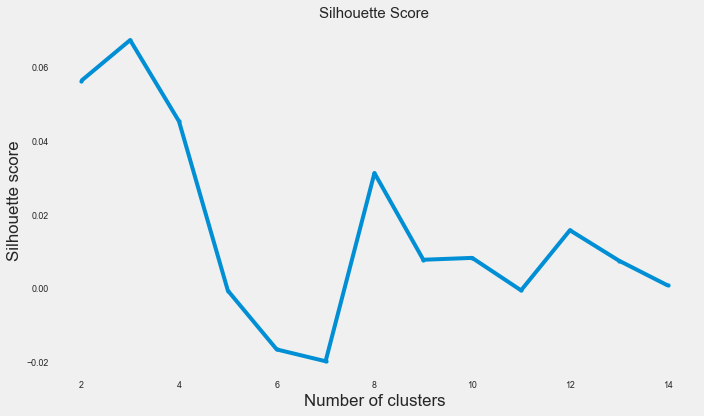

In [902]:
data = pd.DataFrame(scores)

plt.figure(figsize=(10, 6))
sns.lineplot(x="k", y="score", data=data)
sns.scatterplot(x="k", y="score", data=data)
plt.title("Silhouette Score", fontsize=15)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid()
plt.tight_layout()
plt.show()

In [903]:
km_6 = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km_6.fit(matrix_filled)

km_5 = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km_5.fit(matrix_filled)

km_4 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km_4.fit(matrix_filled)

km_3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km_3.fit(matrix_filled)

km_2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km_2.fit(matrix_filled)


km_8 = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km_8.fit(matrix_filled)


#y_means = km_5.fit_predict(x)



KMeans(random_state=0)

In [821]:
km_6

KMeans(n_clusters=6, random_state=0)

In [822]:
km_6.labels_

array([0, 0, 4, 5, 0, 0, 5, 5, 5, 5, 5, 5, 0, 5, 0, 5, 2, 0, 5, 4, 0, 0,
       0, 5, 5, 0, 5, 5, 4, 5, 0, 5, 4, 4, 4, 4, 5, 5, 4, 4, 5, 5, 5, 5,
       5, 5, 4, 5, 0, 4, 3, 5, 5, 5, 4, 5, 5, 0, 5, 5, 4, 0, 0, 0, 5, 5,
       3, 0, 0, 5, 0, 5, 0, 5, 0, 0, 0, 4, 0, 5, 5, 0, 5, 5, 0, 4, 5, 4,
       5, 5, 5, 0, 2, 0, 5, 3, 3, 5, 5, 4, 5, 0, 5, 0, 4, 5, 4, 5, 5, 5,
       4, 4, 5, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 3, 5, 4, 5, 5, 4, 5, 5, 5,
       4, 4, 5, 0, 5, 3, 0, 4, 5, 0, 4, 5, 5, 4, 4, 3, 4, 4, 5, 5, 0, 0,
       4, 0, 0, 5, 5, 0, 0, 5, 5, 5, 5, 4, 5, 5, 5, 4, 4, 3, 4, 5, 3, 0,
       0, 5, 4, 5, 0, 3, 5, 0, 5, 5, 5, 5, 0, 5, 4, 0, 0, 0, 5, 5, 5, 0,
       0, 5, 0, 5, 5, 0, 4, 4, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 0, 0, 4,
       0, 4, 5, 5, 5, 5, 0, 5, 4, 5, 5, 0, 5, 0, 0, 5, 5, 5, 0, 4, 4, 4,
       0, 0, 5, 0, 5, 0, 5, 0, 5, 5, 5, 5, 0, 5, 0, 4, 5, 4, 4, 0, 5, 5,
       5, 0, 5, 0, 0, 5, 0, 5, 4, 5, 5, 5, 5, 5, 0, 0, 4, 4, 5, 4, 5, 5,
       5, 5, 3, 5, 5, 5, 0, 5, 3, 5, 0, 5, 0, 4, 5,

In [849]:
! pip install helper

  Created wheel for helper: filename=helper-2.5.0-py2.py3-none-any.whl size=19190 sha256=4463ce94b0d64565b666cc8ec32a6773a35851ac714eb420887d1ed4e8986955
  Stored in directory: c:\users\samue\appdata\local\pip\cache\wheels\0c\c3\08\b32631b20c0b6cd85065fceb6778dedb619461007e8f8ccba9
Successfully built helper


In [862]:
matrix_filled

item      1         2         3         4         5         6         7     \
user                                                                         
1     5.000000  3.000000  4.000000  3.000000  3.000000  5.000000  4.000000   
2     4.000000  3.324567  3.003743  3.700958  3.423246  3.595126  4.074316   
3     3.925730  3.226330  3.194736  3.569765  3.352824  3.530824  4.075156   
4     4.050000  3.273363  3.050328  3.646511  3.325524  3.542480  3.724712   
5     4.000000  3.000000  3.000643  3.626605  3.376785  3.594457  3.900116   
...        ...       ...       ...       ...       ...       ...       ...   
939   3.949403  3.323712  3.077060  3.650479  3.624991  3.584564  4.124549   
940   3.949621  3.524849  3.352205  2.000000  3.476071  3.589266  4.000000   
941   5.000000  3.448652  3.100960  3.525345  3.525069  3.542244  4.000000   
942   4.024577  3.549884  3.300924  3.799926  3.625816  3.591931  3.498837   
943   4.049746  5.000000  3.200766  3.699561  3.549125  3.583192  3.875009   

item      8         9         10    ...  1673  1674  1675  1676  1677  \
user                                ...                                 
1     1.000000  5.000000  3.000000  ...   3.0   4.0   3.0   2.0   3.0   
2     4.000157  4.076488  2.000000  ...   3.0   4.0   3.0   2.0   3.0   
3     3.950682  4.174231  3.925489  ...   3.0   4.0   3.0   2.0   3.0   
4     3.998902  3.874648  4.075922  ...   3.0   4.0   3.0   2.0   3.0   
5     3.899244  3.975786  3.754313  ...   3.0   4.0   3.0   2.0   3.0   
...        ...       ...       ...  ...   ...   ...   ...   ...   ...   
939   3.876020  5.000000  3.974887  ...   3.0   4.0   3.0   2.0   3.0   
940   5.000000  3.000000  4.050886  ...   3.0   4.0   3.0   2.0   3.0   
941   4.199219  4.050733  4.048443  ...   3.0   4.0   3.0   2.0   3.0   
942   4.400651  4.049686  4.023823  ...   3.0   4.0   3.0   2.0   3.0   
943   4.075430  3.000000  3.873318  ...   3.0   4.0   3.0   2.0   3.0   

item     1678     1679     1680  1681  1682  
user                                         
1     1.00000  3.00000  2.00000   3.0   3.0  
2     1.00000  3.00000  2.00000   3.0   3.0  
3     1.00000  3.00000  2.00000   3.0   3.0  
4     1.00000  3.00000  2.00000   3.0   3.0  
5     1.00000  3.00000  2.00000   3.0   3.0  
...       ...      ...      ...   ...   ...  
939   1.00000  3.00000  2.00000   3.0   3.0  
940   1.00000  3.00000  2.00000   3.0   3.0  
941   1.00000  3.00000  2.00000   3.0   3.0  
942   1.00000  3.00000  2.00000   3.0   3.0  
943   3.52986  3.52986  3.52986   3.0   3.0  

[943 rows x 1682 columns]

In [863]:
matrix_filled.columns

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682],
           dtype='int64', name='item', length=1682)

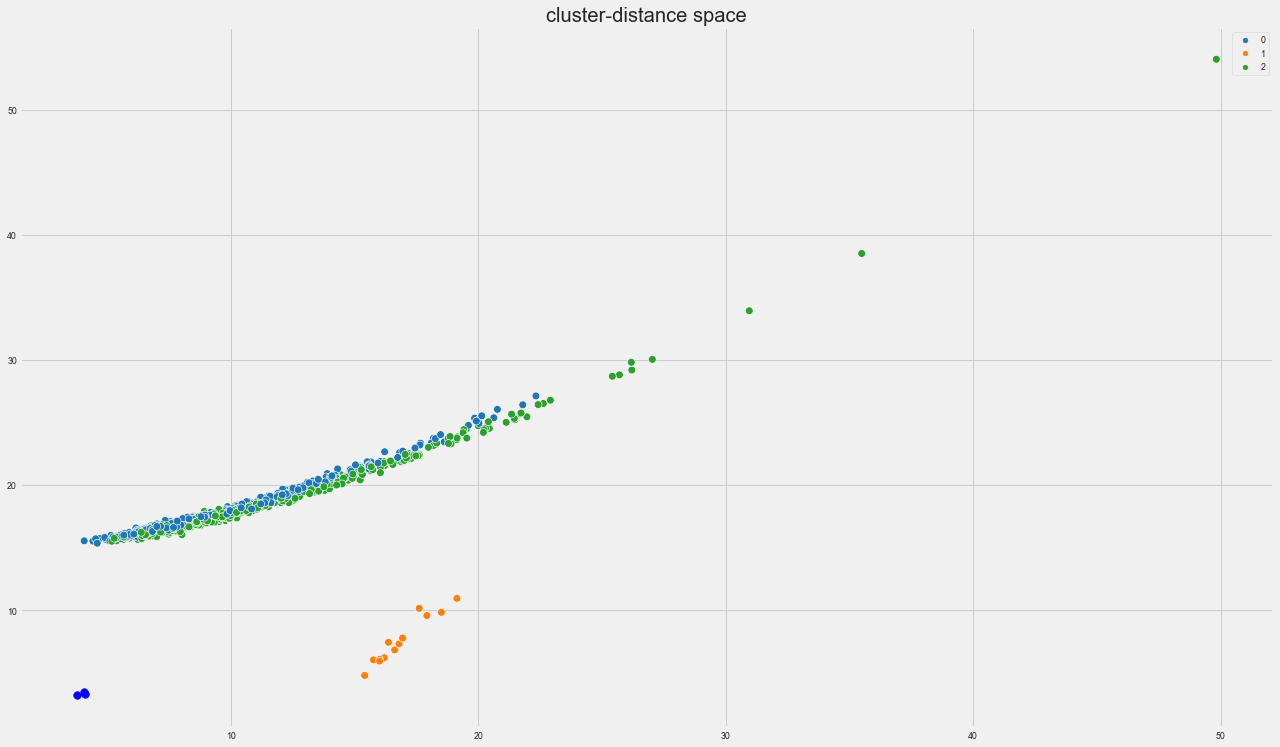

In [885]:
trasformed = km_3.fit_transform(matrix_filled)

plt.figure(figsize=(20,12))


sns.scatterplot(
    x = trasformed[:,0], y=trasformed[:, 1], hue=km_3.labels_,
     palette="tab10", legend="full",  s = 60 
)
plt.scatter(km_3.cluster_centers_[:,0], km_3.cluster_centers_[:, 1], s = 60, c = 'blue' , label = 'centeroid')

plt.title('cluster-distance space')
plt.show()

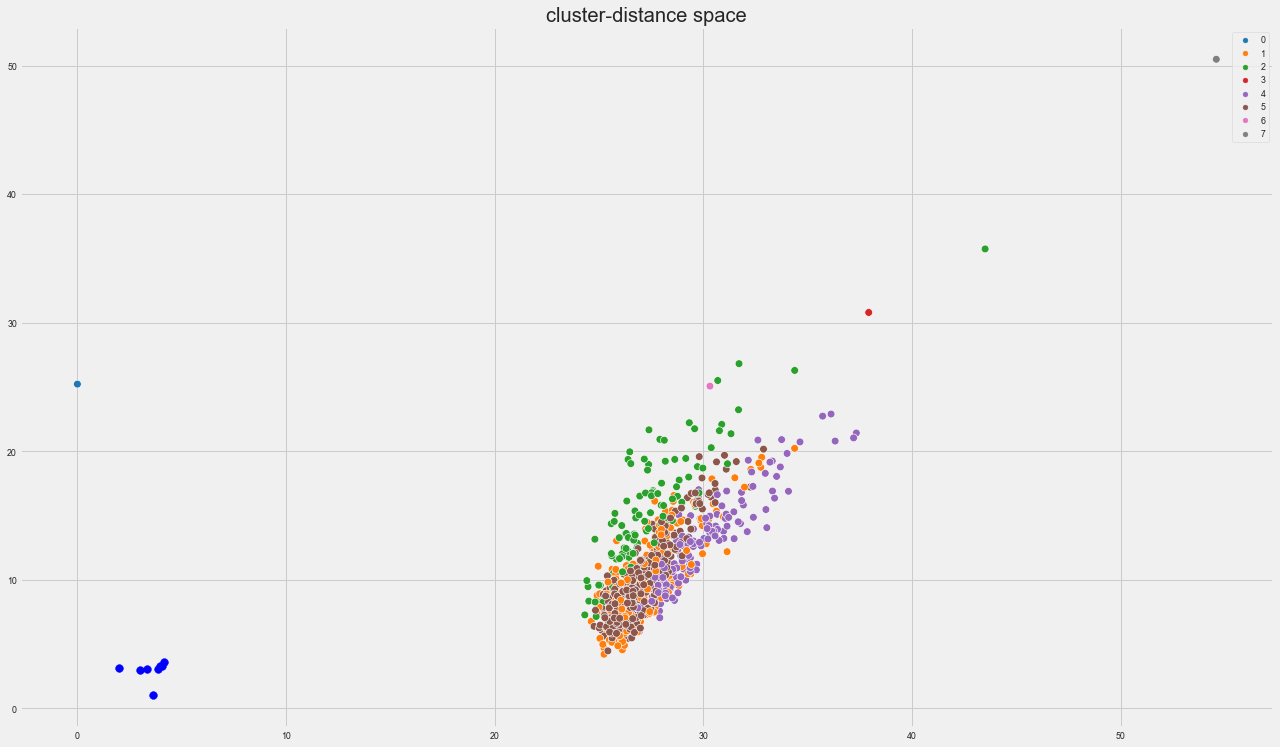

In [904]:
trasformed = km_8.fit_transform(matrix_filled)

plt.figure(figsize=(20,12))


sns.scatterplot(
    x = trasformed[:,0], y=trasformed[:, 1], hue=km_8.labels_,
     palette="tab10", legend="full",  s = 60 
)
plt.scatter(km_8.cluster_centers_[:,0], km_8.cluster_centers_[:, 1], s = 60, c = 'blue' , label = 'centeroid')

plt.title('cluster-distance space')
plt.show()

# AGGIUNTA COLONNA LABEL AL DF PRINCIPALE

In [914]:
labels = km_8.fit_predict(matrix_filled)

label_dict = {}

for user, label in zip(matrix_filled.index, labels):
    label_dict[user] = label
    
def get_label(user):
    return label_dict[user]

merged_df["label"] = merged_df.user.apply(lambda x: get_label(x))

merged_df.head()

user  item  rating  timestamp  movie_id  \
0   196   242       3  881250949       242   
1   196   257       2  881251577       257   
2   196   111       4  881251793       111   
3   196    25       4  881251955        25   
4   196   382       4  881251843       382   

                                         movie_title release_date  \
0                                       Kolya (1996)  24-Jan-1997   
1                                Men in Black (1997)  04-Jul-1997   
2                Truth About Cats & Dogs, The (1996)  26-Apr-1996   
3                               Birdcage, The (1996)  08-Mar-1996   
4  Adventures of Priscilla, Queen of the Desert, ...  01-Jan-1994   

   video_release_date                                           IMDb_URL  \
0                 NaN    http://us.imdb.com/M/title-exact?Kolya%20(1996)   
1                 NaN  http://us.imdb.com/M/title-exact?Men+in+Black+...   
2                 NaN  http://us.imdb.com/M/title-exact?Truth%20About...   
3                 NaN  http://us.imdb.com/M/title-exact?Birdcage,%20T...   
4                 NaN  http://us.imdb.com/M/title-exact?Adventures%20...   

   unknown  ...  age_range  sentiment                           genre  \
0        0  ...  old-adult       Like                          Comedy   
1        0  ...  old-adult    Dislike  Action_Adventure_Comedy_Sci_Fi   
2        0  ...  old-adult        Top                  Comedy_Romance   
3        0  ...  old-adult        Top                          Comedy   
4        0  ...  old-adult        Top                    Comedy_Drama   

   review_number  user_review_number  score  date  year  release_year  label  
0            117                  39      1  1997  1997          1997      5  
1            303                  39     -2  1997  1997          1997      5  
2            272                  39      2  1997  1997          1996      5  
3            293                  39      2  1997  1997          1996      5  
4            111                  39      2  1997  1997          1994      5  

[5 rows x 43 columns]

<AxesSubplot:xlabel='label'>

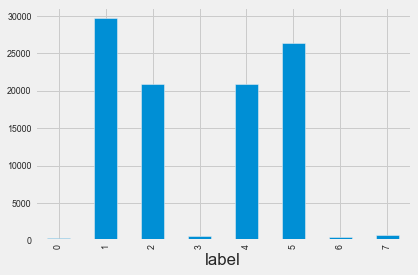

In [932]:
merged_df.groupby("label").count().user.plot.bar()




user                  323
item                  323
rating                323
timestamp             323
movie_id              323
movie_title           323
release_date          323
video_release_date      0
IMDb_URL              323
unknown               323
Action                323
Adventure             323
Animation             323
Children's            323
Comedy                323
Crime                 323
Documentary           323
Drama                 323
Fantasy               323
Film_Noir             323
Horror                323
Musical               323
Mystery               323
Romance               323
Sci_Fi                323
Thriller              323
War                   323
Western               323
user_id               323
age                   323
gender                323
occupation            323
zip_code              323
age_range             323
sentiment             323
genre                 323
review_number         323
user_review_number    323
score       

In [945]:
merged_df.columns

Index(['user', 'item', 'rating', 'timestamp', 'movie_id', 'movie_title',
       'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western', 'user_id',
       'age', 'gender', 'zip_code', 'age_range', 'sentiment', 'genre',
       'review_number', 'user_review_number', 'score', 'date', 'year',
       'release_year', 'label', 'occupation_administrator',
       'occupation_artist', 'occupation_doctor', 'occupation_educator',
       'occupation_engineer', 'occupation_entertainment',
       'occupation_executive', 'occupation_healthcare', 'occupation_homemaker',
       'occupation_lawyer', 'occupation_librarian', 'occupation_marketing',
       'occupation_none', 'occupation_other', 'occupation_programmer',
       'occupation_retired', 'occupation_salesman', 'occupation_scie

# ENCODING CATEGORICAL FEATURES

In [937]:
merged_df = pd.get_dummies(merged_df, columns=["occupation"])

In [940]:
merged_df["gender_int"] = merged_df.gender.apply(lambda x: 1 if x == 'M' else 0)

In [944]:
 merged_df[["gender_int", "gender"]].sample(10)

gender_int gender
94014           1      M
27238           1      M
79608           1      M
66709           0      F
84618           1      M
99329           1      M
9852            0      F
63271           1      M
58672           1      M
22422           1      M

In [947]:
mean_df.columns

Index(['user', 'item', 'rating', 'timestamp', 'movie_id', 'video_release_date',
       'unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western',
       'user_id', 'age', 'review_number', 'user_review_number', 'score',
       'date', 'year', 'release_year'],
      dtype='object')

C:\Users\samue\AppData\Local\Temp/ipykernel_2776/389534740.py:18: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



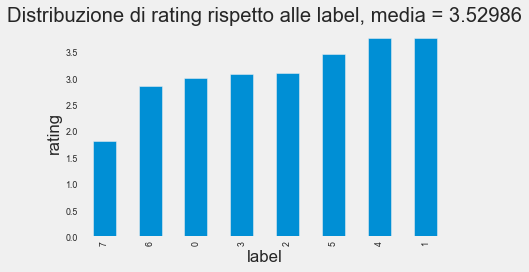

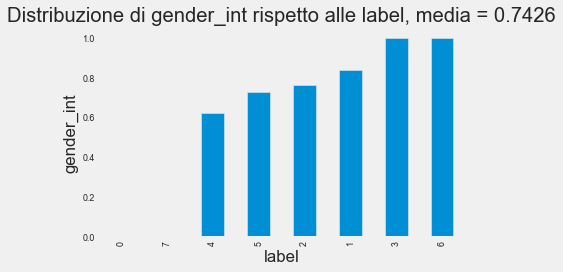

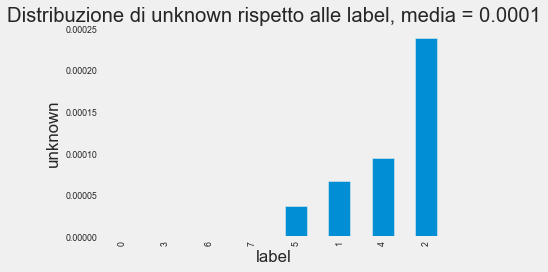

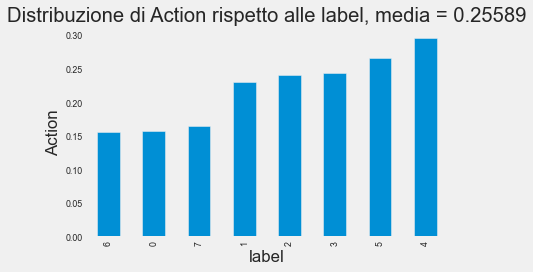

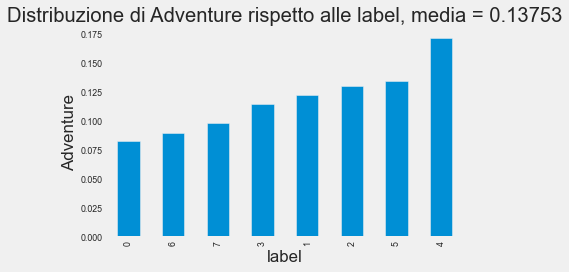

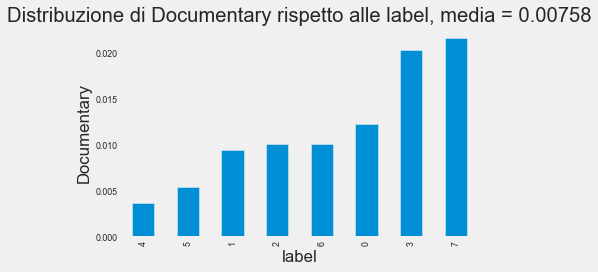

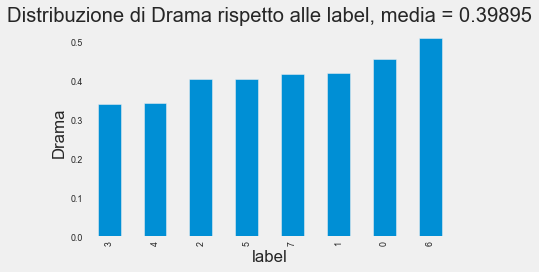

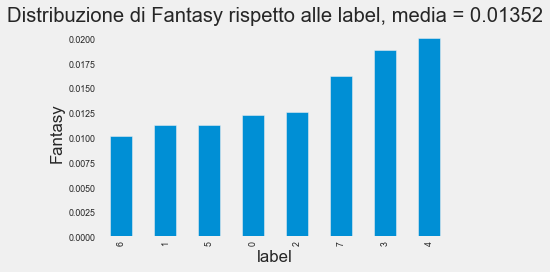

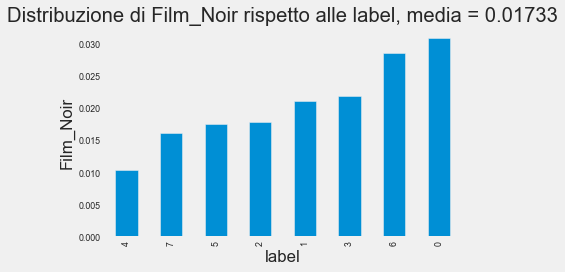

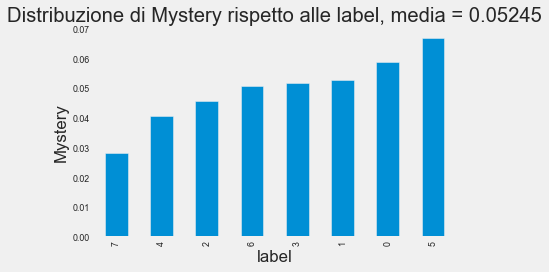

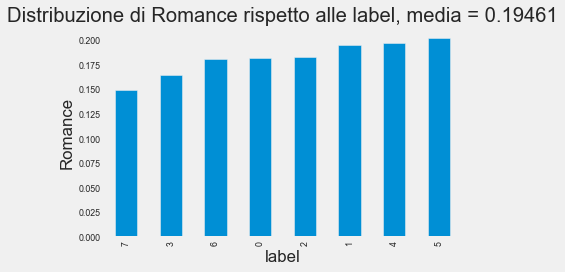

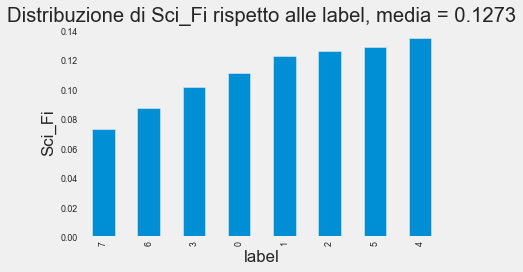

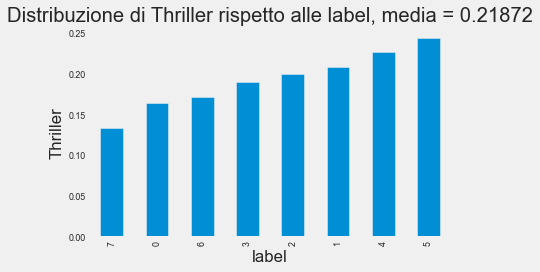

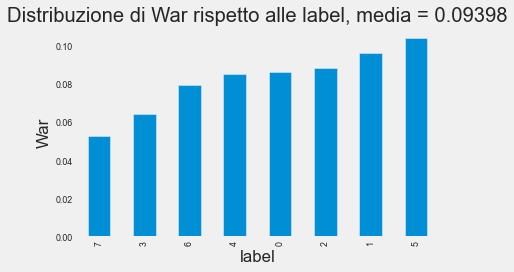

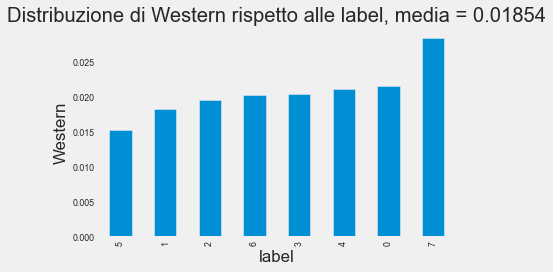

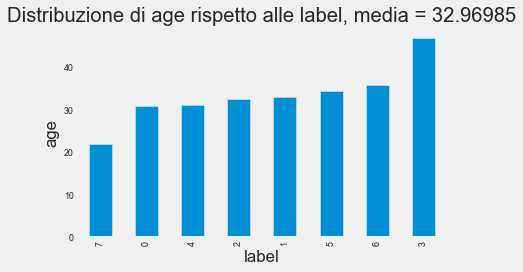

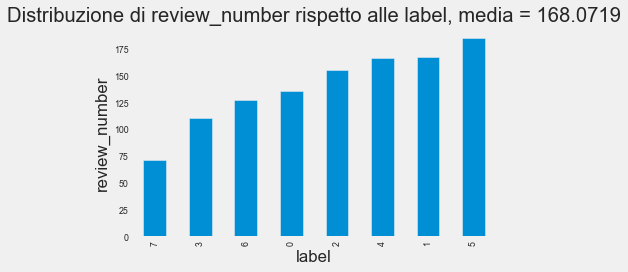

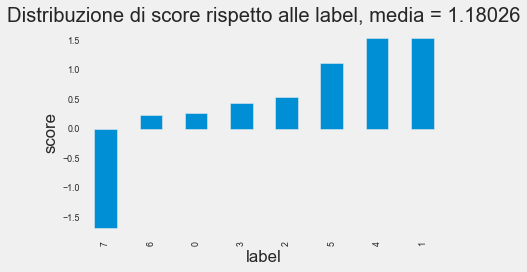

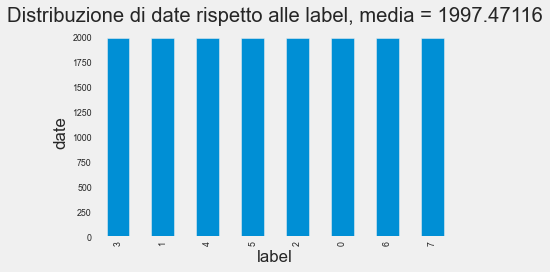

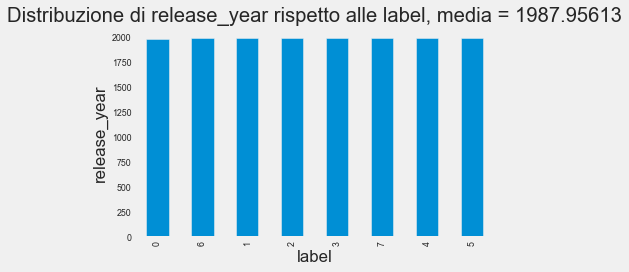

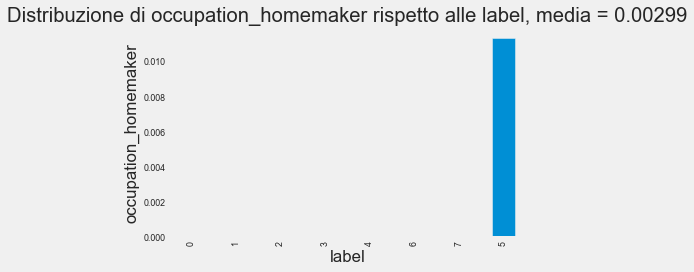

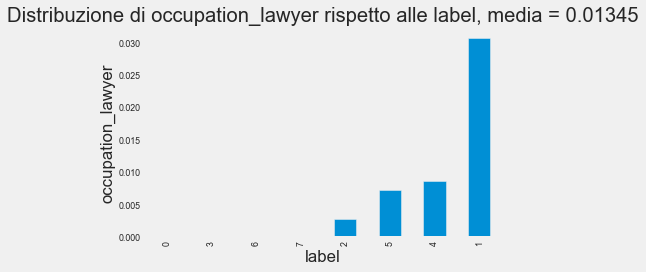

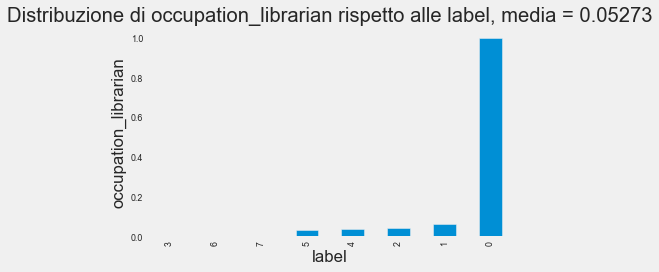

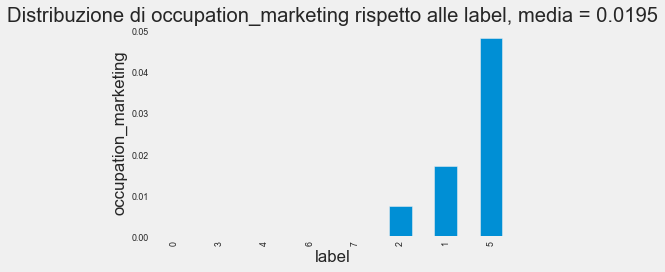

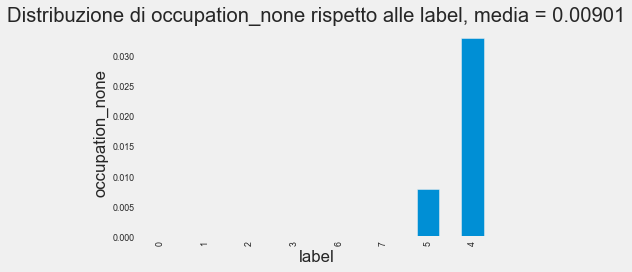

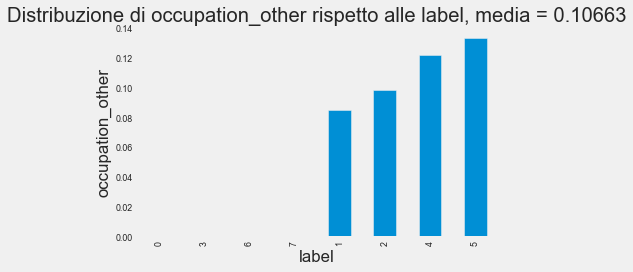

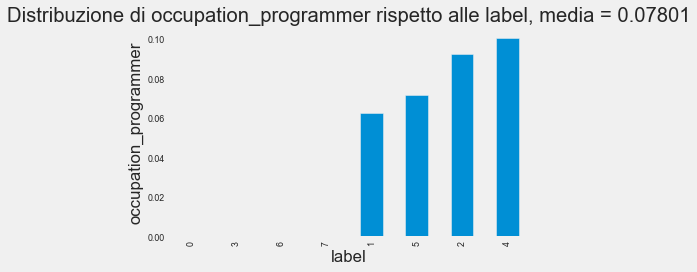

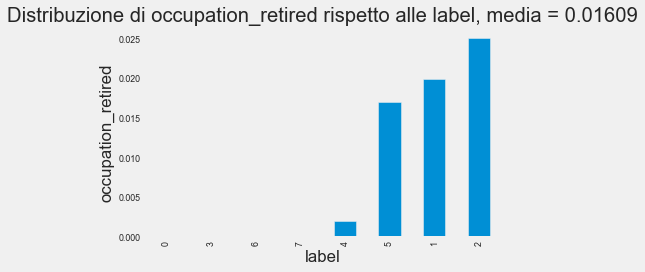

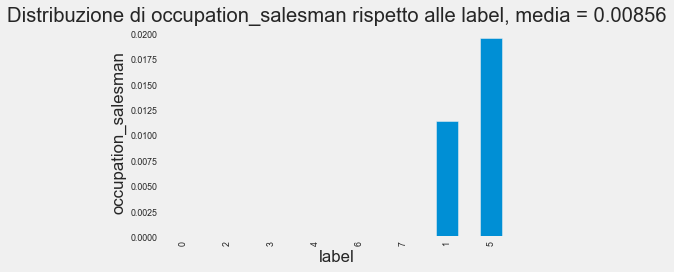

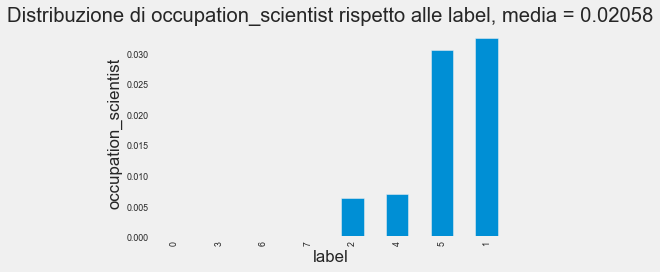

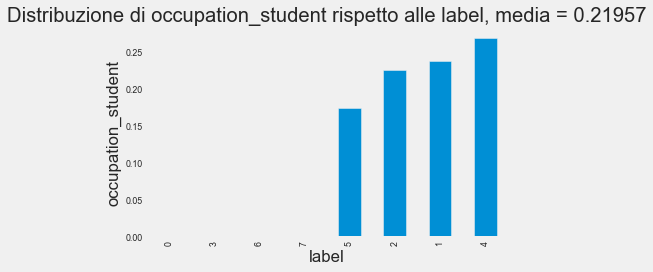

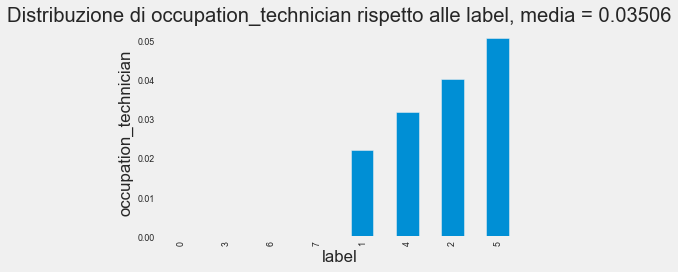

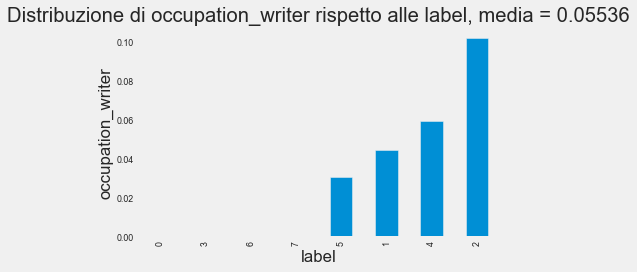

In [948]:
mean_df = merged_df.groupby("label").mean()

columns = ['rating', 'gender_int', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western',
       'age', 'review_number', 'user_review_number', 'score',
       'date', 'year', 'release_year', 'occupation_administrator',
       'occupation_artist', 'occupation_doctor', 'occupation_educator',
       'occupation_engineer', 'occupation_entertainment',
       'occupation_executive', 'occupation_healthcare', 'occupation_homemaker',
       'occupation_lawyer', 'occupation_librarian', 'occupation_marketing',
       'occupation_none', 'occupation_other', 'occupation_programmer',
       'occupation_retired', 'occupation_salesman', 'occupation_scientist',
       'occupation_student', 'occupation_technician', 'occupation_writer']


for col in columns:
    plt.figure()
    
    mean_df[col].dtype
    
    mean_df[col].sort_values().plot.bar()  

    plt.title(f'Distribuzione di {col} rispetto alle label, media = {merged_df[col].mean()}')
    plt.ylabel(col)
    plt.grid()
    plt.tight_layout()
    
    # Show/save figure as desired.
plt.show()

# networkx

In [1140]:
import networkx as nx
from sklearn.neighbors import NearestNeighbors

In [1151]:
labels = km_8.fit_predict(matrix_filled)

label_dict = {}



for user, label in zip(matrix_filled.index, labels):
    label_dict[user] = label
    
def get_node_label(user):
    return label_dict[user+1]  # l'indice dei nodi del grafo parte da 0

def get_node_color(node):
    color_label_dict = {
        0: "yellow",
        1: "green",
        2: "blue",
        3: "orange",
        4: "red",
        5: "blue",
        6: "brown",
        7: "black"
    }
    return color_label_dict[get_node_label(node)]

In [1141]:
nn = NearestNeighbors(metric="cosine")
nn.fit(matrix_filled)

NearestNeighbors(metric='cosine')

In [1142]:
adj_matrix = nn.kneighbors_graph(matrix_filled, mode="distance")
adj_matrix

<943x943 sparse matrix of type '<class 'numpy.float64'>'
	with 4715 stored elements in Compressed Sparse Row format>

In [1143]:
G = nx.from_scipy_sparse_matrix(adj_matrix, edge_attribute="cosine")

G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
pos = nx.spring_layout(G)


plt.figure(figsize=(15, 15))
# nodes

node_color = [get_node_color(node) for node in G.nodes]
node_size = [G.degree(node) * 5 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, alpha=0.7, edgecolors="white")
# edges
nx.draw_networkx_edges(G, pos, edge_color="lightgray")
plt.axis("off")
plt.show()

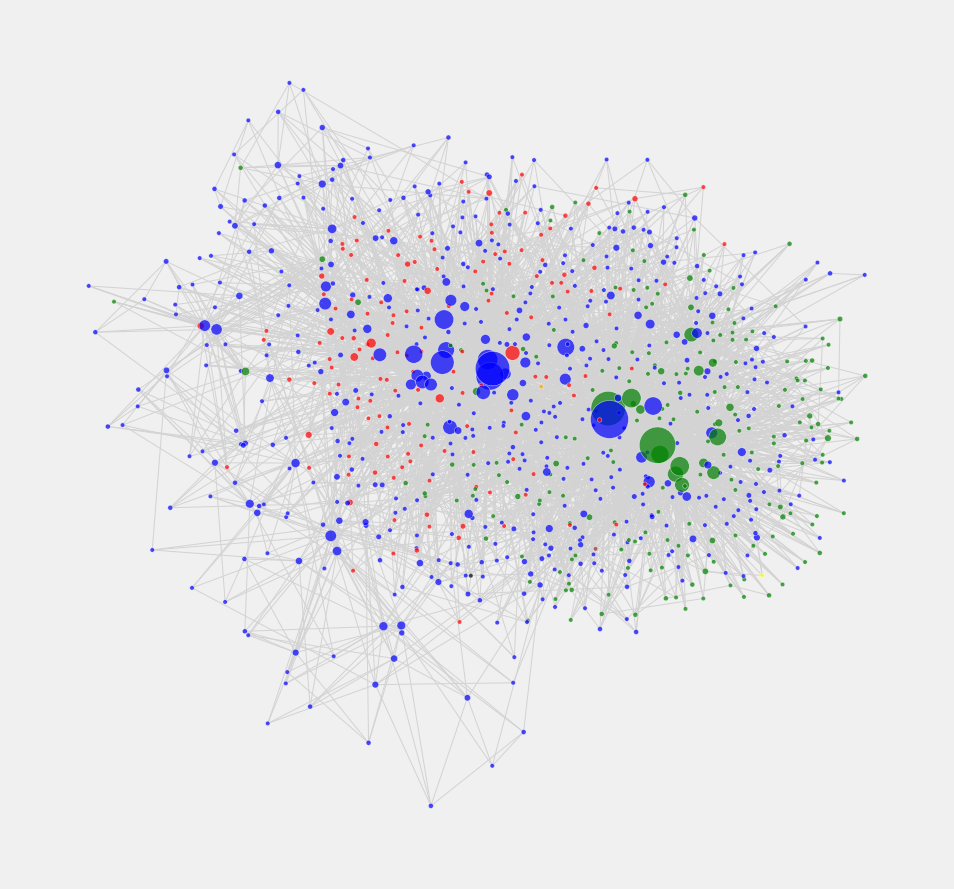

In [1150]:
plt.figure(figsize=(15, 15))
# nodes

pos = nx.spring_layout(G, weight="cosine")

node_color = [get_node_color(node) for node in G.nodes]
node_size = [G.degree(node) * 5 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, alpha=0.7, edgecolors="white")
# edges
nx.draw_networkx_edges(G, pos, edge_color="lightgray")
plt.axis("off")
plt.show()

In [1030]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_df = pd.DataFrame(cosine_similarity(matrix_filled))

cosine_df.shape

(943, 943)

In [1090]:
cosine_df.head()
cosine_df[0].describe()

count    943.000000
mean       0.988781
std        0.003917
min        0.916655
25%        0.987717
50%        0.989843
75%        0.990816
max        1.000000
Name: 0, dtype: float64

In [1129]:
G_cos = nx.Graph()

for u1 in cosine_df.index:
    for u2 in cosine_df.columns:
        if u1 != u2 and cosine_df[u1][u2] > 0.8:
            if not G_cos.has_edge(u1, u1):
                if not G_cos.has_node(u1):
                    G_cos.add_node(u1)
                if not G_cos.has_node(u2):
                    G_cos.add_node(u2)
                G_cos.add_edge(u1, u2, weight=cosine_df[u1][u2])

            



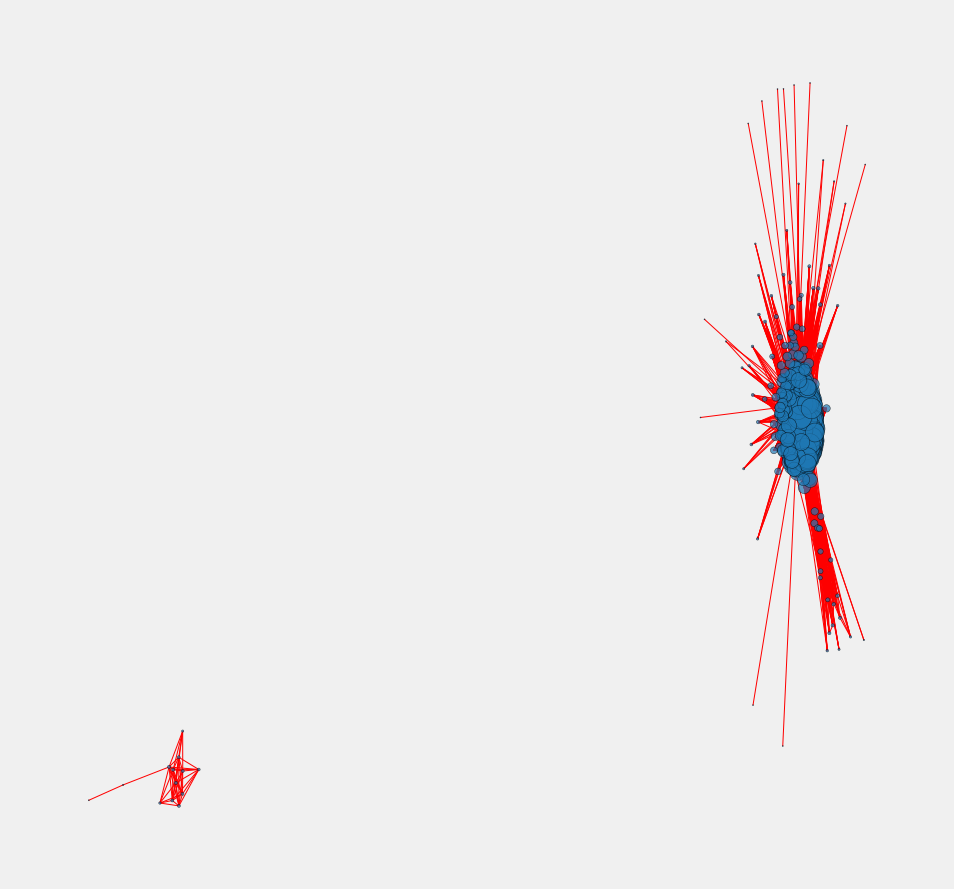

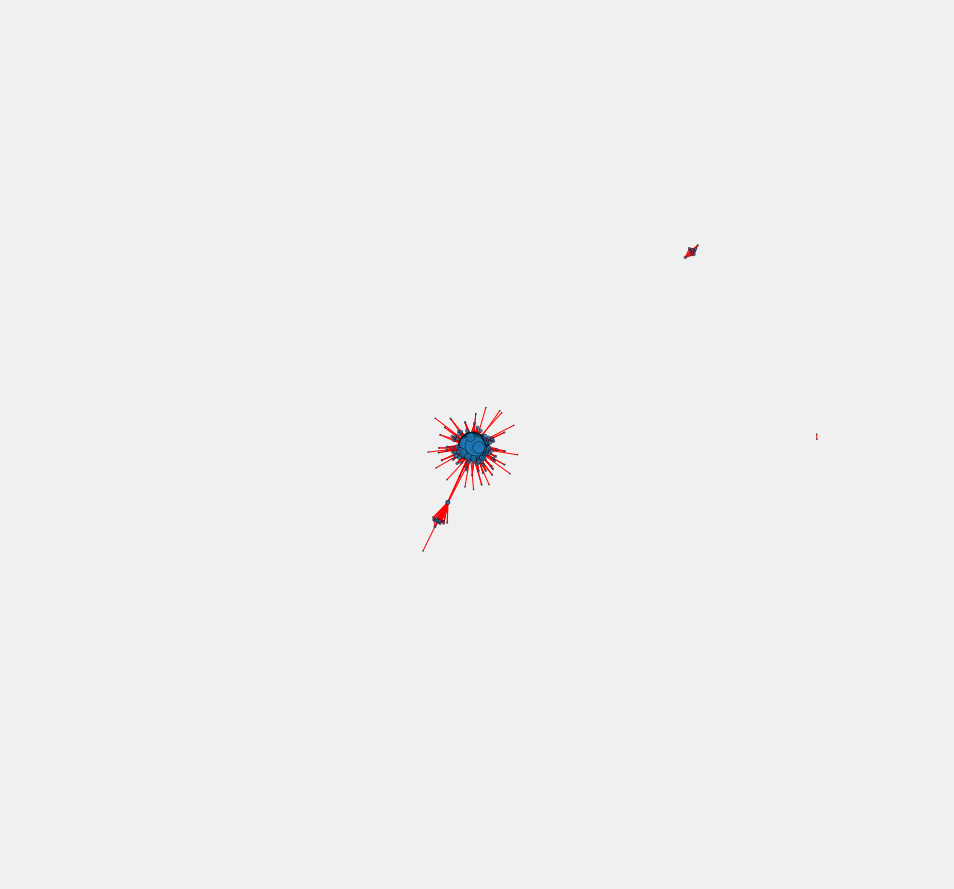

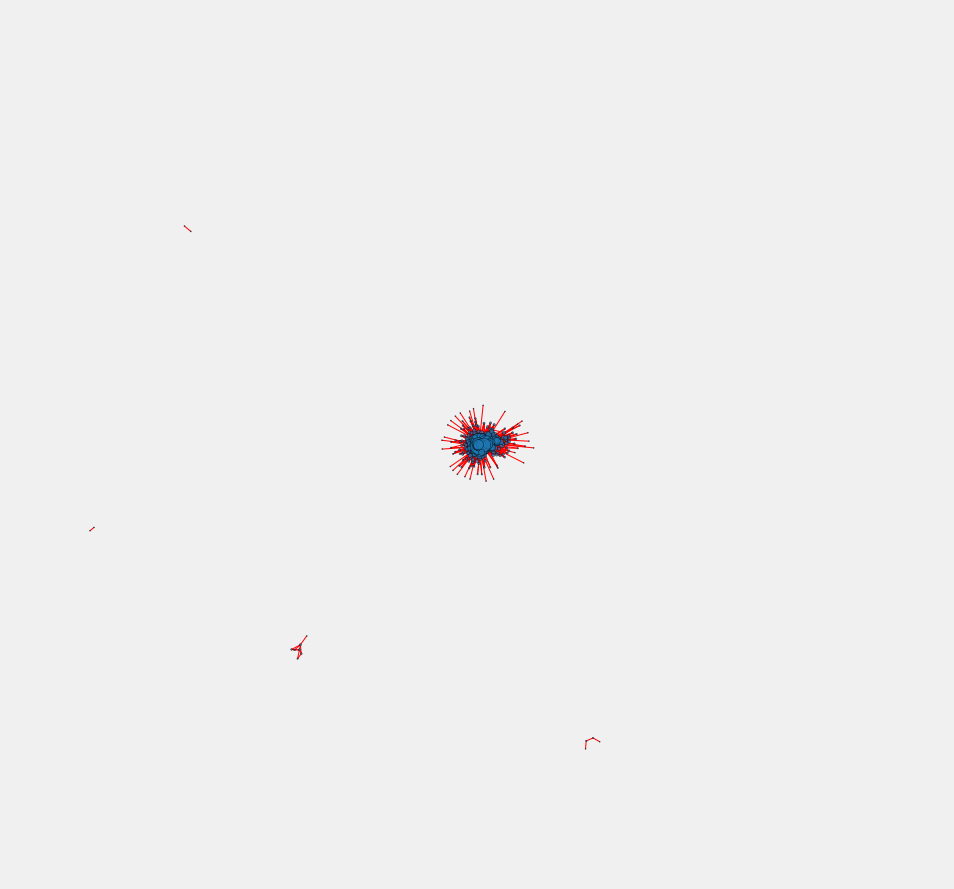

In [1099]:
for th in [0.996, 0.997, 0.998, 0.999]:
    to_remove = [e for e in G_cos.edges(data=True) if e[2]['weight'] < th]
    G_cos.remove_edges_from(to_remove)
    #G.remove_node(1)
    pos_cos = nx.spring_layout(G_cos)
    plt.figure(figsize=(15, 15))
    # nodes
    node_size = [G_cos.degree(node) for node in G_cos.nodes()]
    nx.draw_networkx_nodes(G_cos, pos_cos, node_size=node_size, alpha=0.7, edgecolors="black")
    # edges
    nx.draw_networkx_edges(G_cos, pos_cos, edge_color="red", arrowsize=[e[2]['weight']*10 for e in G_cos.edges(data=True)])
    plt.axis("off")



plt.show()

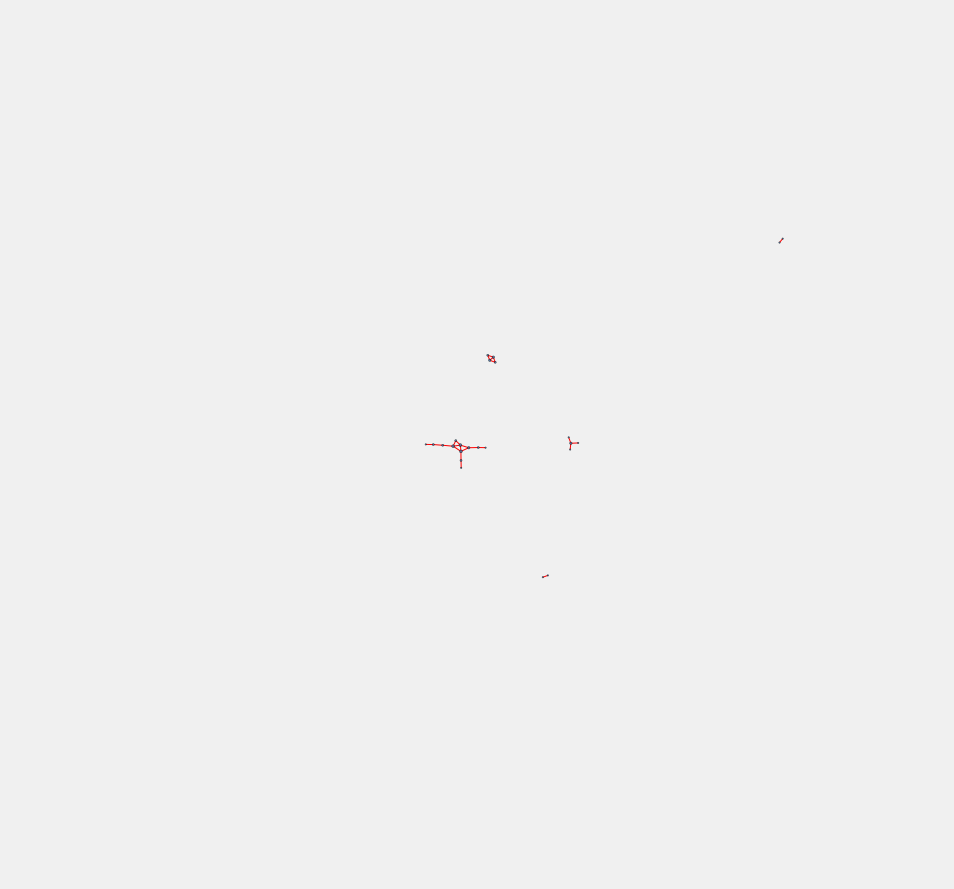

In [1096]:
for th in [0.9980, 0.9985, 0.9987, 0.9989]:
    to_remove = [e for e in G_cos.edges(data=True) if e[2]['weight'] < th]
    G_cos.remove_edges_from(to_remove)
    #G.remove_node(1)
    pos_cos = nx.spring_layout(G_cos)
    plt.figure(figsize=(15, 15))
    # nodes
    node_size = [G_cos.degree(node) * 2 for node in G_cos.nodes()]
    nx.draw_networkx_nodes(G_cos, pos_cos, node_size=node_size, alpha=0.7, edgecolors="black")
    # edges
    nx.draw_networkx_edges(G_cos, pos_cos, edge_color="red", arrowsize=[e[2]['weight']*10 for e in G_cos.edges(data=True)])
    plt.axis("off")



plt.show()


In [1152]:
G_cos = nx.Graph()

for u1 in cosine_df.index:
    for u2 in cosine_df.columns:
        if u1 != u2 and cosine_df[u1][u2] > 0.998:
            if not G_cos.has_edge(u1, u1):
                if not G_cos.has_node(u1):
                    G_cos.add_node(u1)
                if not G_cos.has_node(u2):
                    G_cos.add_node(u2)
                G_cos.add_edge(u1, u2, weight=cosine_df[u1][u2])

            



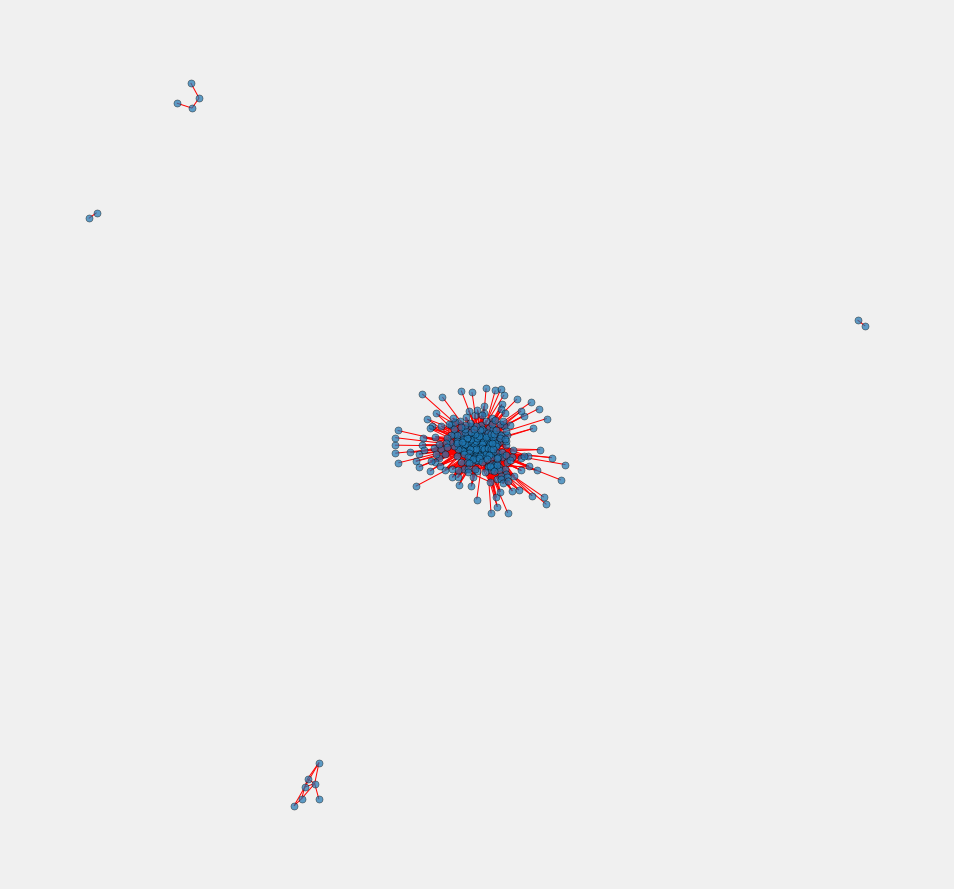

In [1118]:
pos_cos = nx.spring_layout(G_cos, scale=10, weight='weight')

plt.figure(figsize=(15, 15))
# nodes
node_size = [G_cos.degree(node) for node in G_cos.nodes()]
nx.draw_networkx_nodes(G_cos, pos_cos, alpha=0.7, edgecolors="black", node_size=50)
# edges
label = [e[2]['weight'] for e in G_cos.edges(data=True)]
nx.draw_networkx_edges(G_cos, pos_cos, edge_color="red", label=label, arrowsize=[e[2]['weight']*10 for e in G_cos.edges(data=True)])
plt.axis("off")
plt.show()

In [1158]:
pos_cos = nx.spring_layout(G_cos, scale=1000000000, weight='weight')

plt.figure(figsize=(15, 15))

node_color = [get_node_color(node) for node in G_cos.nodes]

# nodes
node_size = [G_cos.degree(node) for node in G_cos.nodes()]
nx.draw_networkx_nodes(G_cos, pos_cos, alpha=0.7, edgecolors="black", node_size=50, node_color=node_color)
# edges
label = [e[2]['weight'] for e in G_cos.edges(data=True)]
nx.draw_networkx_edges(G_cos, pos_cos, edge_color="red", label=label, arrowsize=[e[2]['weight']*10 for e in G_cos.edges(data=True)])
plt.axis("off")
plt.show()

# Filling della matrice di rating attraverso l’algoritmo K-NN usando la correlazione di Pearson

In [ ]:
from surprise import Reader, Dataset
from surprise import BaselineOnly, KNNBaseline, KNNBasic, KNNWithMeans, SVD, NMF
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
from surprise import accuracy

from collections import defaultdict

# SET calcolo della similarità = cosine similarity
sim_options = {'name': 'cosine'}

reader = Reader(rating_scale=(1, 5))


data = Dataset.load_from_df(df[df.columns[:-1]], reader)

train, test = train_test_split(data, test_size=0.2, random_state=42)

sim_options = {'name': 'cosine'}

algo = KNNBasic(sim_options=sim_options)
# K: The (max) number of neighbors to take into account for aggregation. Default is 40.
# min_k: The minimum number of neighbors to take into account for aggregation. If there
    # are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1
# sim_options: A dictionary of options for the similarity measure. The parameter
    # 'user_based’: Define if similarities will be computed between users or between items.
    # Default is True.
# Verbose: Whether to print trace messages of bias estimation, similarity, etc. Default is True.

algo.fit(train)

predictions = algo.test(test)

acc = accuracy.rmse(predictions)

print("RMSE = ", acc)

print("MSE = ", accuracy.mse(predictions))